In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from ydata_profiling import ProfileReport

Analyze Election survey conducted on 1525 voters with 9 variables. This model will analyze which person will vote for which party using given data. 
1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9. gender: female or male.

In [2]:
#pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


## 1.1 Read the dataset. Descriptive statistics and null value condition check.

In [3]:
poll_df= pd.read_excel("/Users/aravindakshan/Downloads/Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [4]:
profile = ProfileReport(poll_df,title="Election Poll Profile")

In [5]:
#profile.to_file("poll_report.html")

In [6]:
poll_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [7]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


#### There are 1525 rows in the given dataset and there are no missing values observed 

#### there are totally 7 integer and 2 object variables

#### the integer variables aren't continuous and represent more of categorical values and hence they have to be converted into categorical type.

In [8]:
poll_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


#### Positive skew is identified in age, economic.cond.national, economic.cond.household, hague, europe
#### negative skew is found in blair, political knowledge
#### political knowledge has minimum of 0 as value, that is absolutely fine
#### Age feature are in scale of tens and other features having units in ones. Since we will apply this to different algorithms, we have to scale the dataset.

In [9]:
poll_df["gender"].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [10]:
pd.pivot_table(data=poll_df,
              index=poll_df['age']>70,
              aggfunc='count',
              values="vote")

,vote
age,
False,1238
True,287


In [11]:
poll_df["vote"].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

#### the object columns contains proper two values which has to be converted for model predictions

In [12]:
duplicates = poll_df[poll_df.duplicated(keep=False)]
print(duplicates)

              vote  age  economic.cond.national  economic.cond.household  \
3           Labour   35                       4                        4   
68          Labour   35                       4                        4   
87    Conservative   53                       3                        4   
334         Labour   38                       2                        4   
391         Labour   39                       3                        4   
578   Conservative   74                       4                        3   
627         Labour   39                       3                        4   
871         Labour   38                       2                        4   
917         Labour   29                       4                        4   
984   Conservative   74                       4                        3   
1038        Labour   40                       4                        3   
1155  Conservative   53                       3                        4   
1210        

#### there are 8 duplicates, since this will bias the model and hence the 8 records has to be removed

In [13]:
poll_df.drop_duplicates(inplace=True)

In [14]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


#### after the duplicates were dropped, the final count of rows comes down to 1517

In [15]:
poll_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

#### there are no missing values as observed during the statistical study on dataset

In [16]:
poll_df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

#### this is countering the statement of statistic observation. 

#### excepting age and hague remaining all features has negative skewness.

## 1.2) EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Check for outliers . Interpret the inferences for each Distribution plots(histogram) or similar plots for the continuous columns. Box plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

### Univariate Analysis

In [17]:
from vizad.univariate import plot_univariate_categorical, plot_univariate_numeric
from vizad.bivariate import plot_bivariate_categorical, plot_bivariate_numeric

In [18]:
num_cols = [col for col in poll_df.columns if poll_df[col].dtype != 'O']
print(num_cols)
cat_cols = [col for col in poll_df.columns if poll_df[col].dtype == 'O']
print(cat_cols)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']
['vote', 'gender']


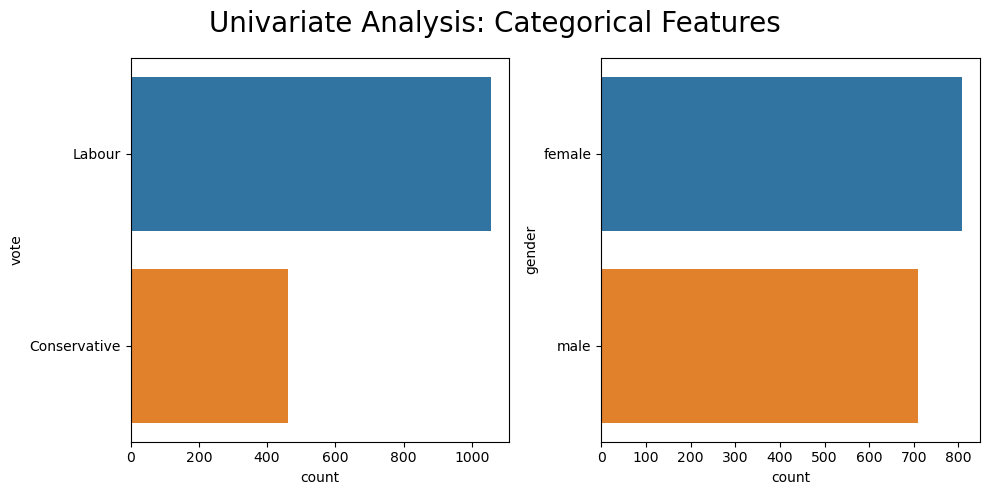

In [19]:
plot_univariate_categorical(poll_df,cat_cols,figsize=(10,5))

#### Female voters are more compared to males.

#### Labour party has maximum number of votes in the dataset.

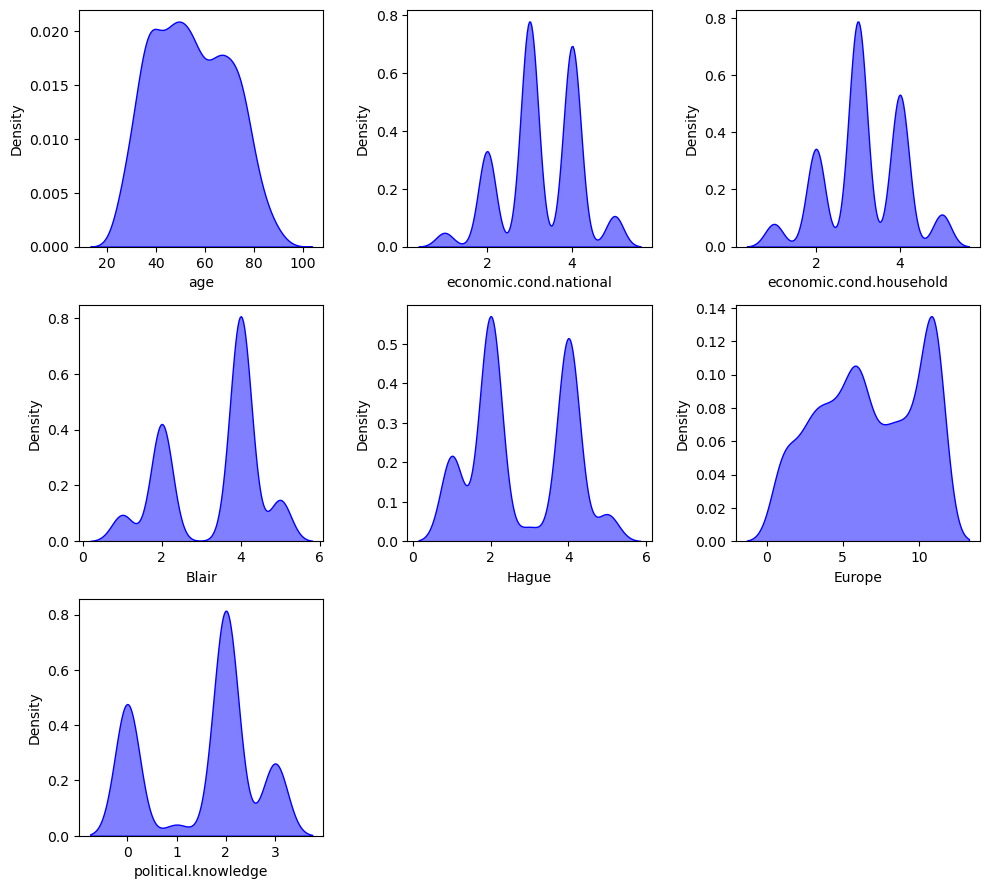

In [20]:
plot_univariate_numeric(poll_df,num_cols,kind='density')

#### there's no uniform distribution of data excepting age feature that shows somewhat normal distribution
#### multi-model pattern is observed is almost all features

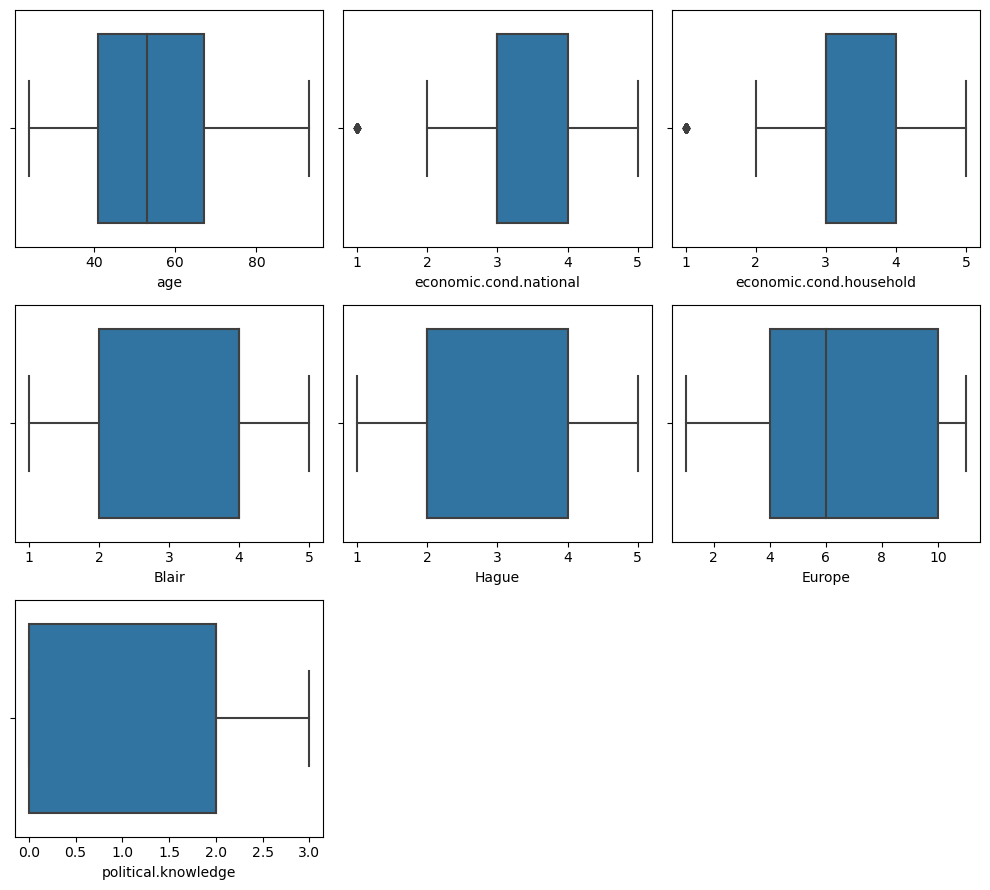

In [21]:
plot_univariate_numeric(poll_df,num_cols,kind='box')

#### outliers are observed in economic.con.national and economic.cond.household, we shall check at the upper and lower limit of each feature to decide if outlier treatment has to be performed or not.

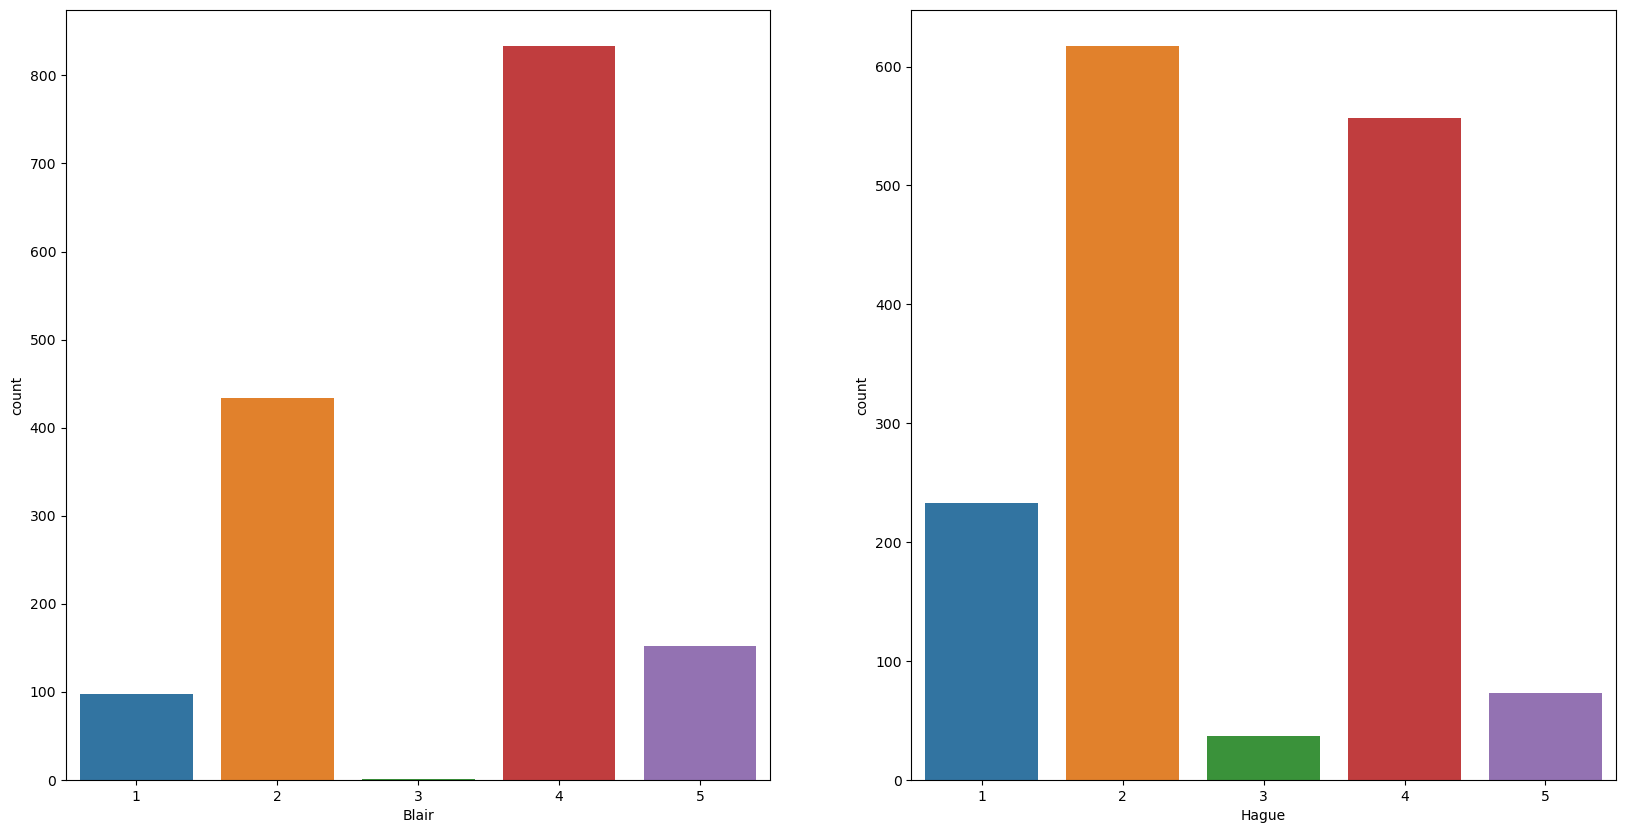

In [22]:
fig,ax=plt.subplots(1,2, figsize=(20,10))
i=0
for col in ["Blair","Hague"]:
    sns.countplot(x=poll_df[col], ax=ax[i]);
    i+=1

In [23]:
data = poll_df[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']].copy()
df = pd.DataFrame(data)

# Calculate IQR and upper/lower bounds for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Upper and Lower Bounds for Outlier Detection:")
for column in df.columns:
    print(f"Feature: {column}")
    print(f"Lower Bound: {lower_bound[column]:.2f}")
    print(f"Upper Bound: {upper_bound[column]:.2f}")
    print("\n")

Upper and Lower Bounds for Outlier Detection:
Feature: age
Lower Bound: 2.00
Upper Bound: 106.00


Feature: economic.cond.national
Lower Bound: 1.50
Upper Bound: 5.50


Feature: economic.cond.household
Lower Bound: 1.50
Upper Bound: 5.50


Feature: Blair
Lower Bound: -1.00
Upper Bound: 7.00


Feature: Hague
Lower Bound: -1.00
Upper Bound: 7.00


Feature: Europe
Lower Bound: -5.00
Upper Bound: 19.00


Feature: political.knowledge
Lower Bound: -3.00
Upper Bound: 5.00




#### Outlier can be ignored as it's one observation falling at lower side

#### though outliers are found in 2 features, they aren't required to be treated as they are ordinal values. Continuous values used in the model has any outlier will impact the model prediction. Here it won't be a problem and we can still check if the metrics is not optimal, we can try with treating too. 


#### This dataset contain high number of observations who are Eurosceptic

#### Population in this dataset shows moderate economic condition range between 3 and 4. 


#### Approx. 420 voters has no knowledge on politics


### Bivariate Analysis

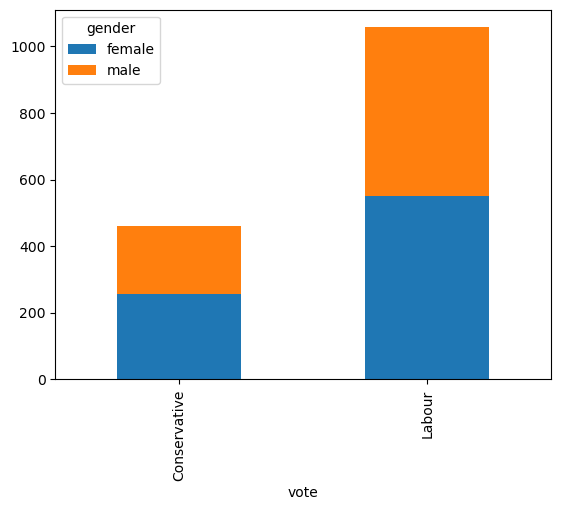

In [24]:
ct=pd.crosstab(poll_df['vote'],poll_df['gender'])
ct.plot.bar(stacked=True);

In [25]:
poll_df.groupby(['gender'])['vote'].value_counts(normalize=True)

gender  vote        
female  Labour          0.681931
        Conservative    0.318069
male    Labour          0.713681
        Conservative    0.286319
Name: vote, dtype: float64

#### Above bar plot shows that the conservative supporter are less compared to labour party
#### Female voters are more compared to male votes

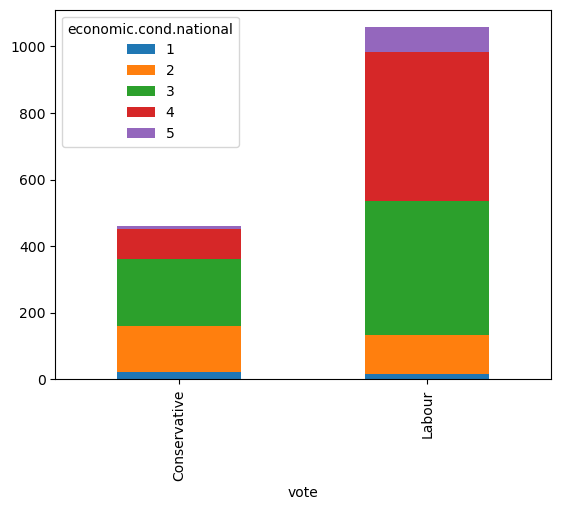

In [26]:
ct=pd.crosstab(poll_df['vote'],poll_df['economic.cond.national'])
ct.plot.bar(stacked=True);

#### Labour party supporters rates '4' the national economy condition majorly 

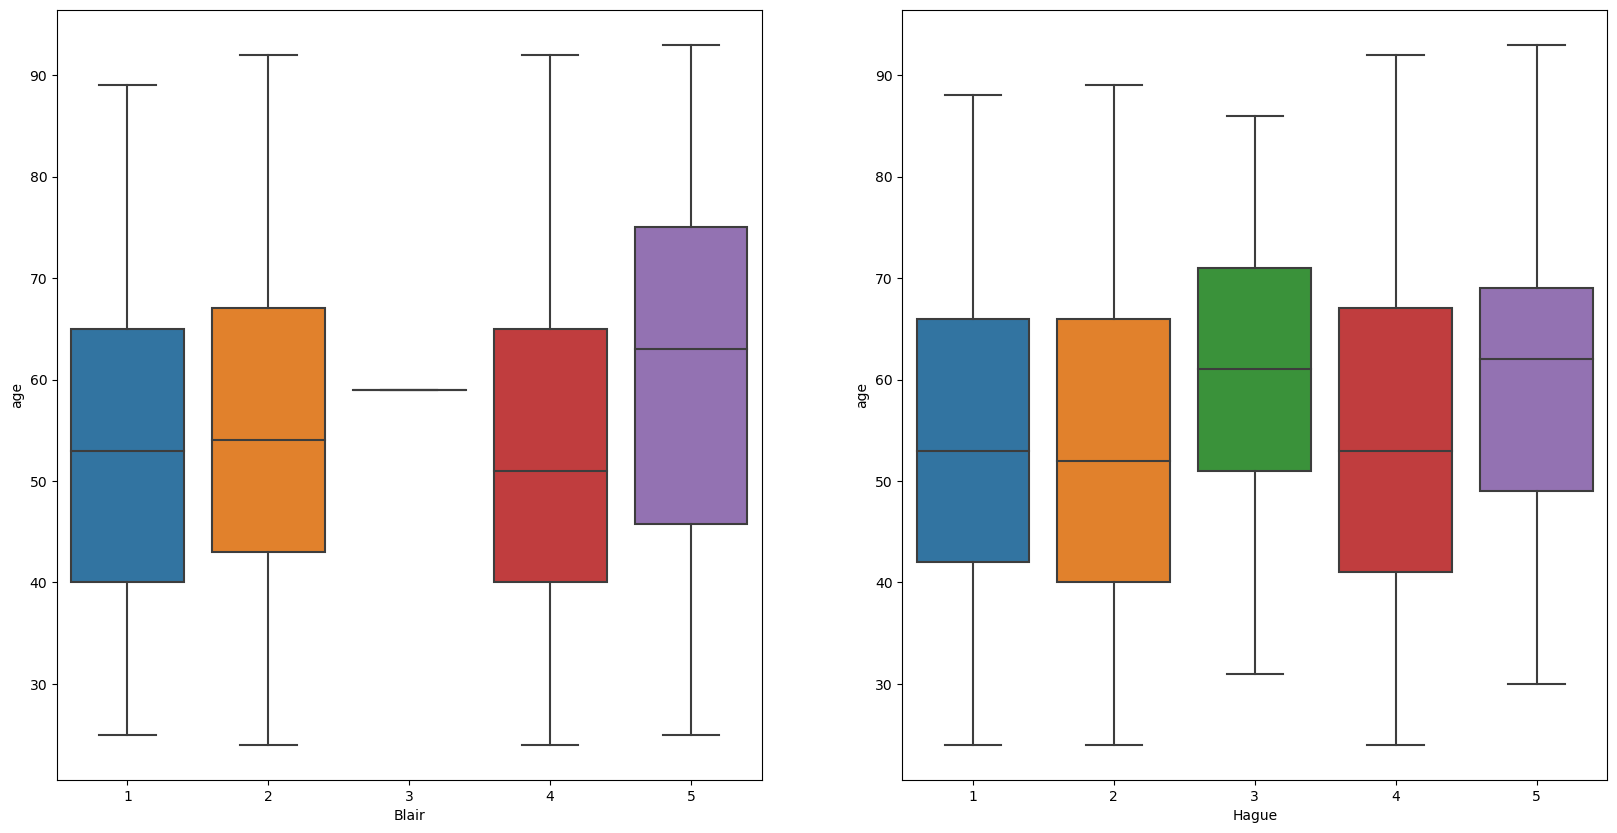

In [27]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,10)
sns.boxplot(data=poll_df,x="Blair",y="age", ax = axes[0])
sns.boxplot(data=poll_df,x="Hague",y="age", ax = axes[1]);

In [28]:
poll_df.groupby([poll_df['age']>70,'vote'])['vote'].count()

age    vote        
False  Conservative    358
       Labour          873
True   Conservative    102
       Labour          184
Name: vote, dtype: int64

#### Blair has maximum number of votes looking at the scale (800) of count plot above
#### Comparitively Blair supports contains few high age persons than Hague
#### 

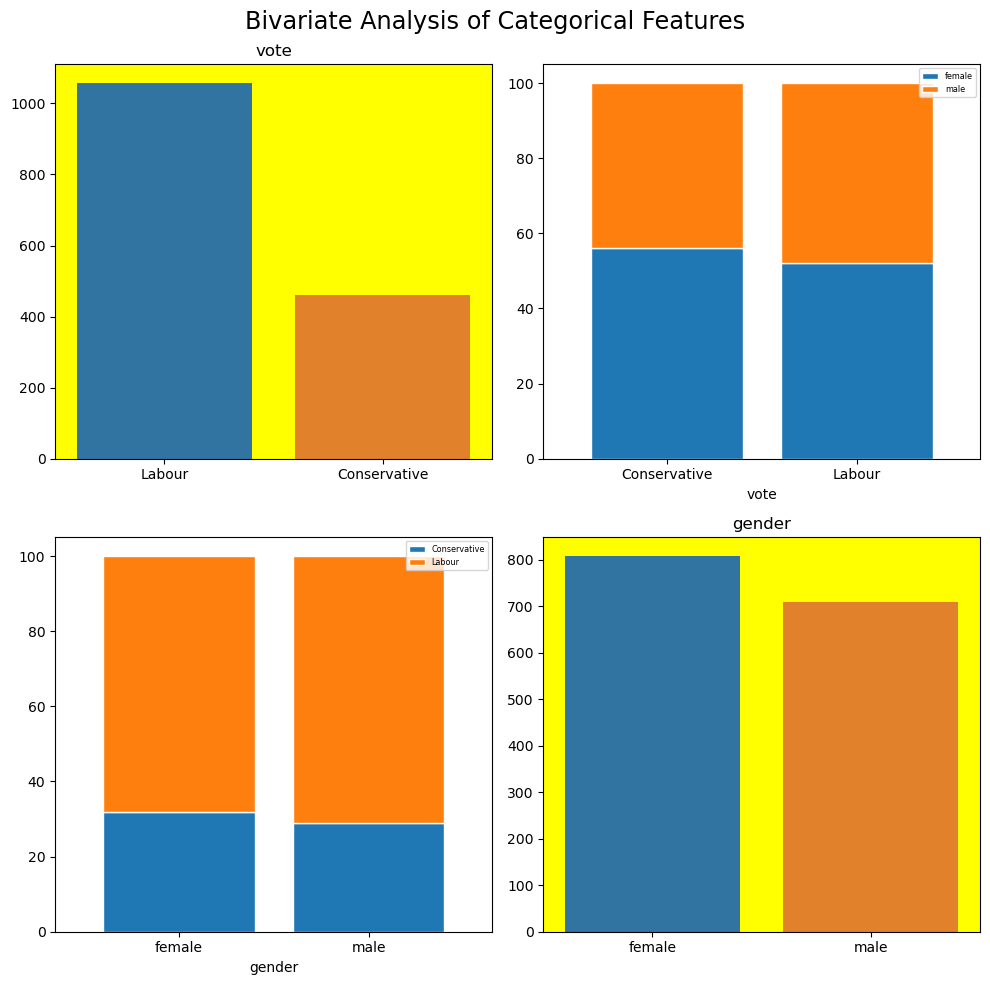

In [29]:
plot_bivariate_categorical(poll_df,cat_cols)

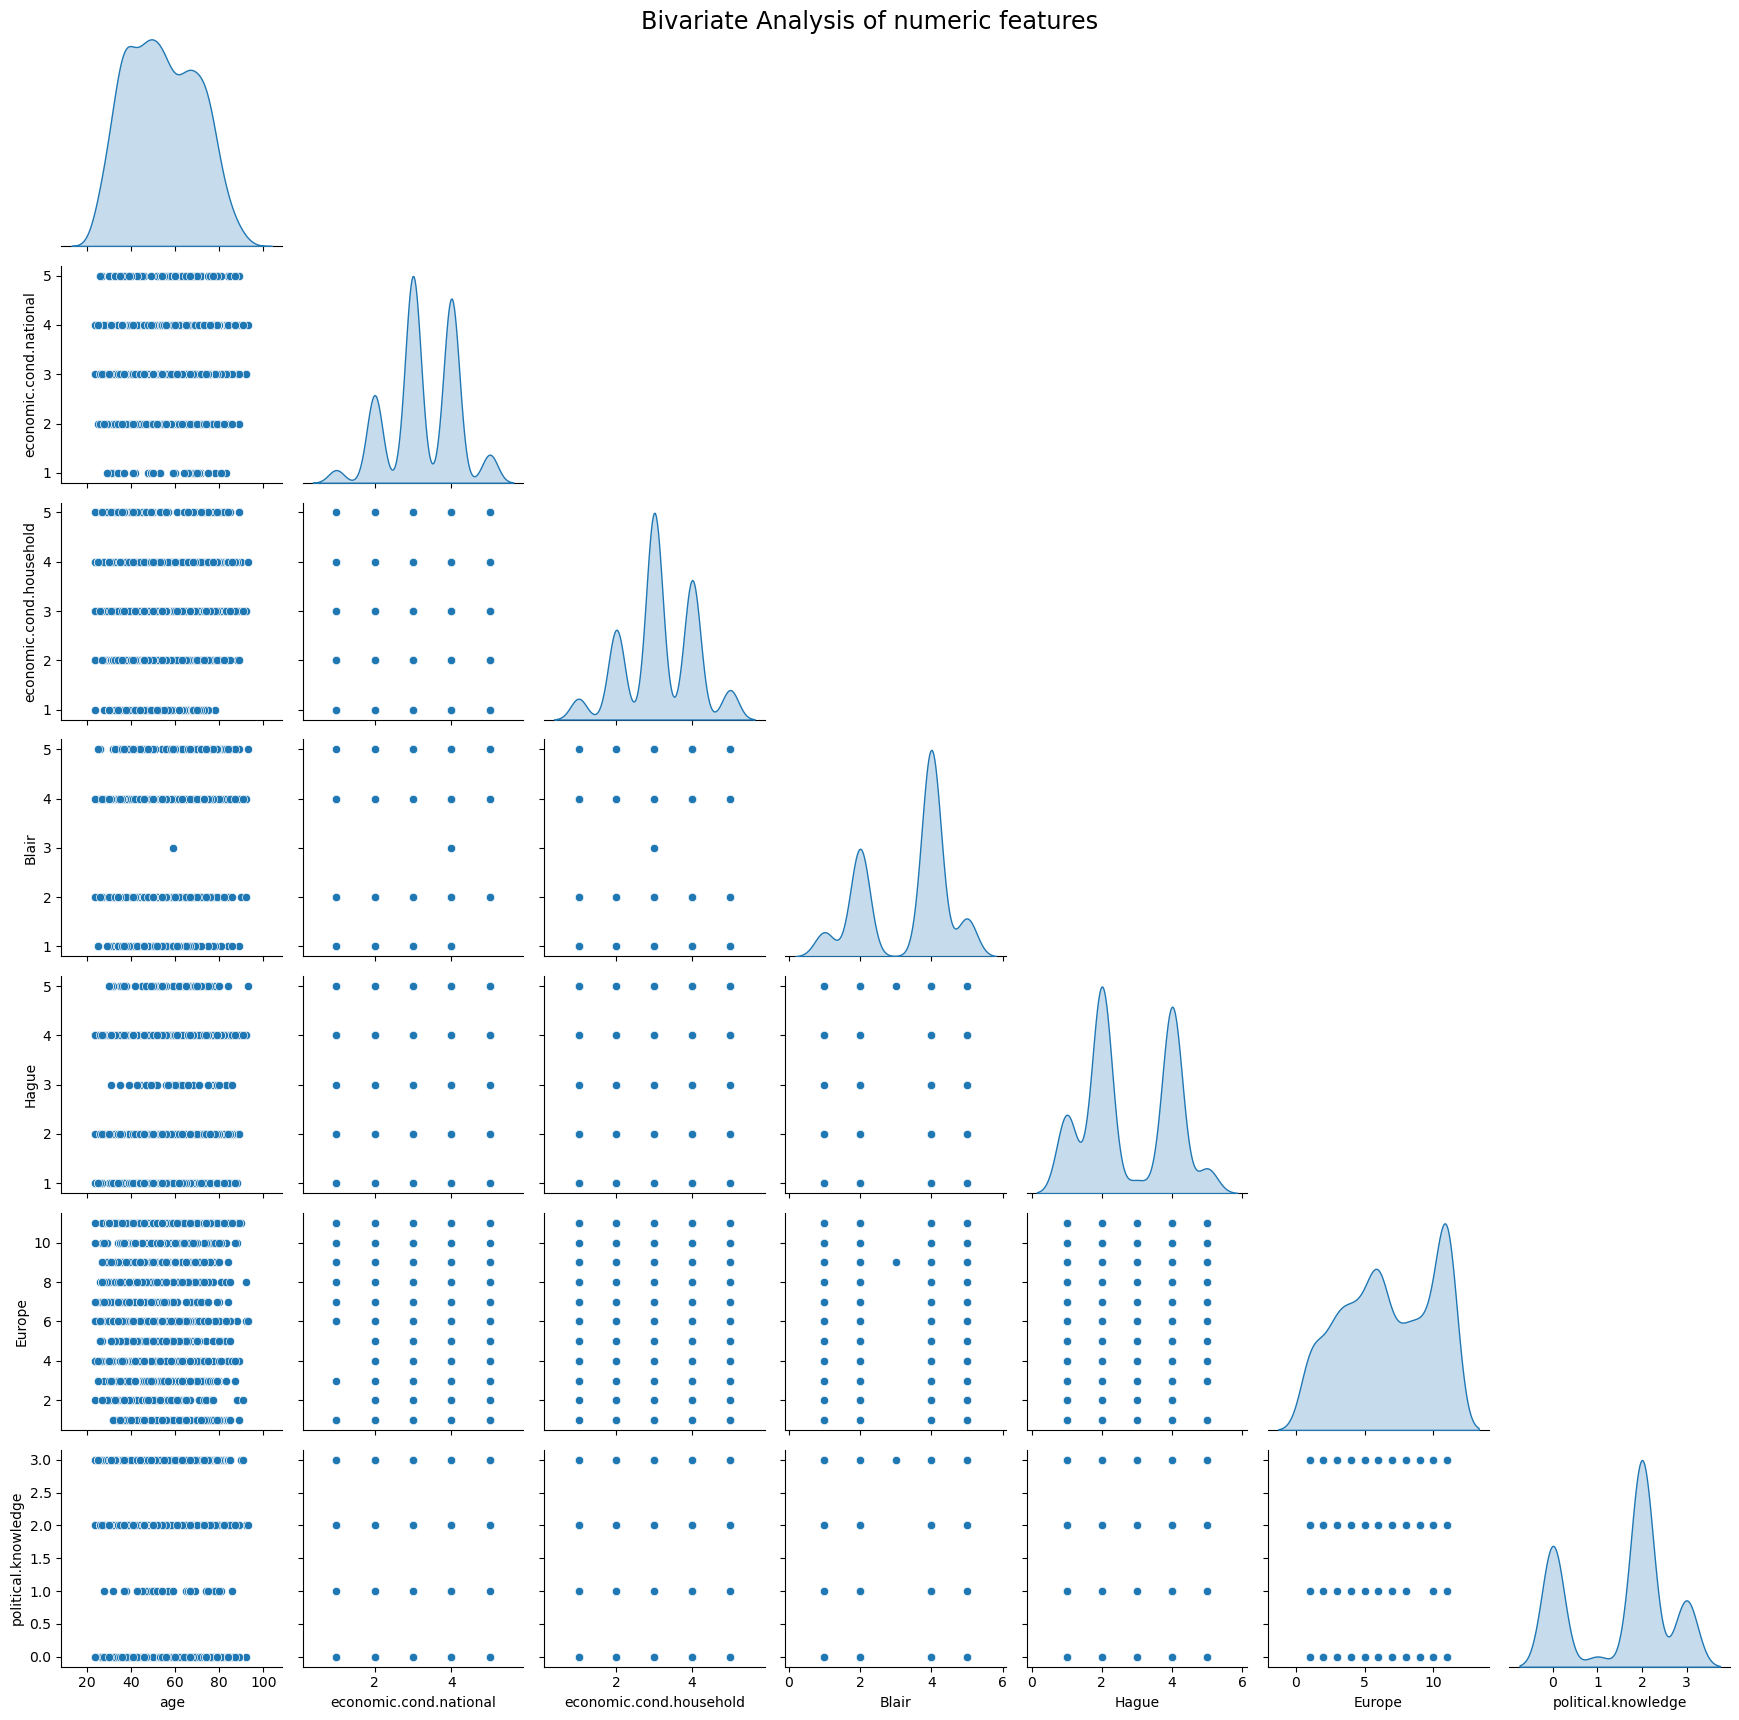

In [30]:
plot_bivariate_numeric(poll_df,num_cols)

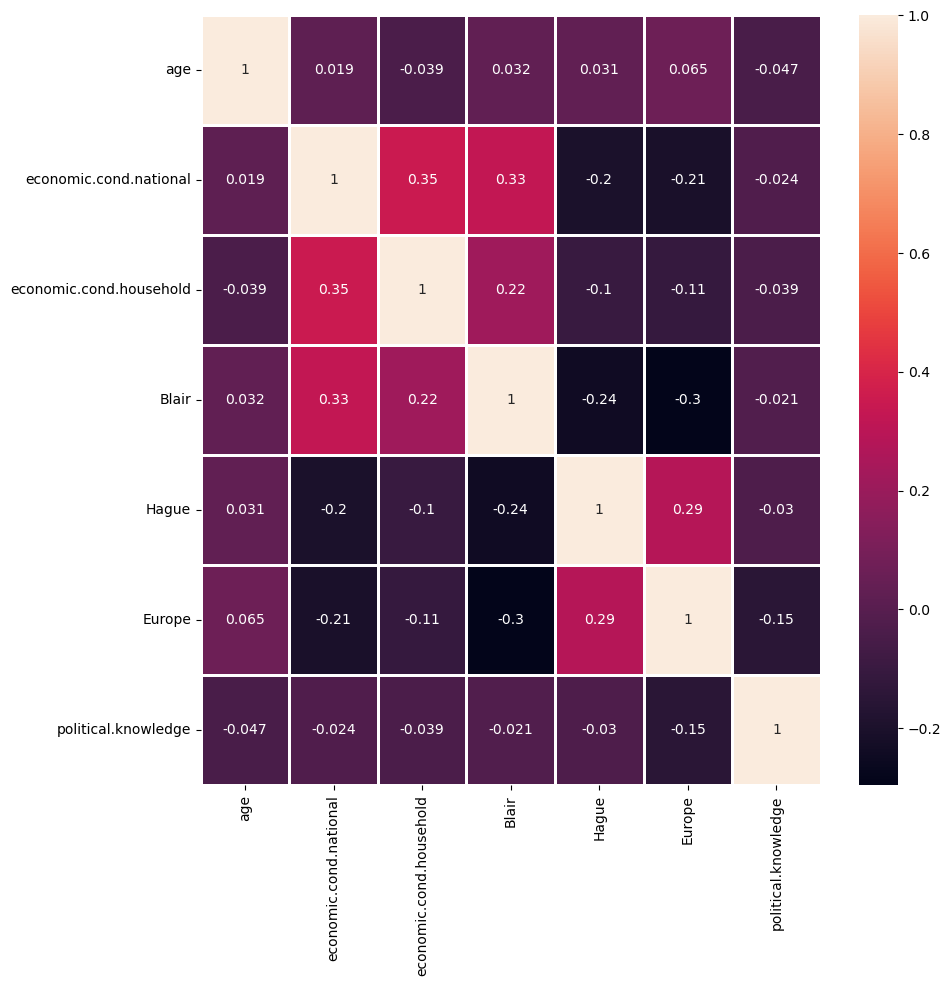

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(poll_df.corr(), annot=True,linewidth = 1)

#### there is no strong correlation between feature , this is good as multicolinearity issue isn't observed in the given dataset. 
#### highest relation is found between Europe and age , political knowledge and age remaining are weekly correlated

#### no need to handle multi-colinearity problem for the given dataset

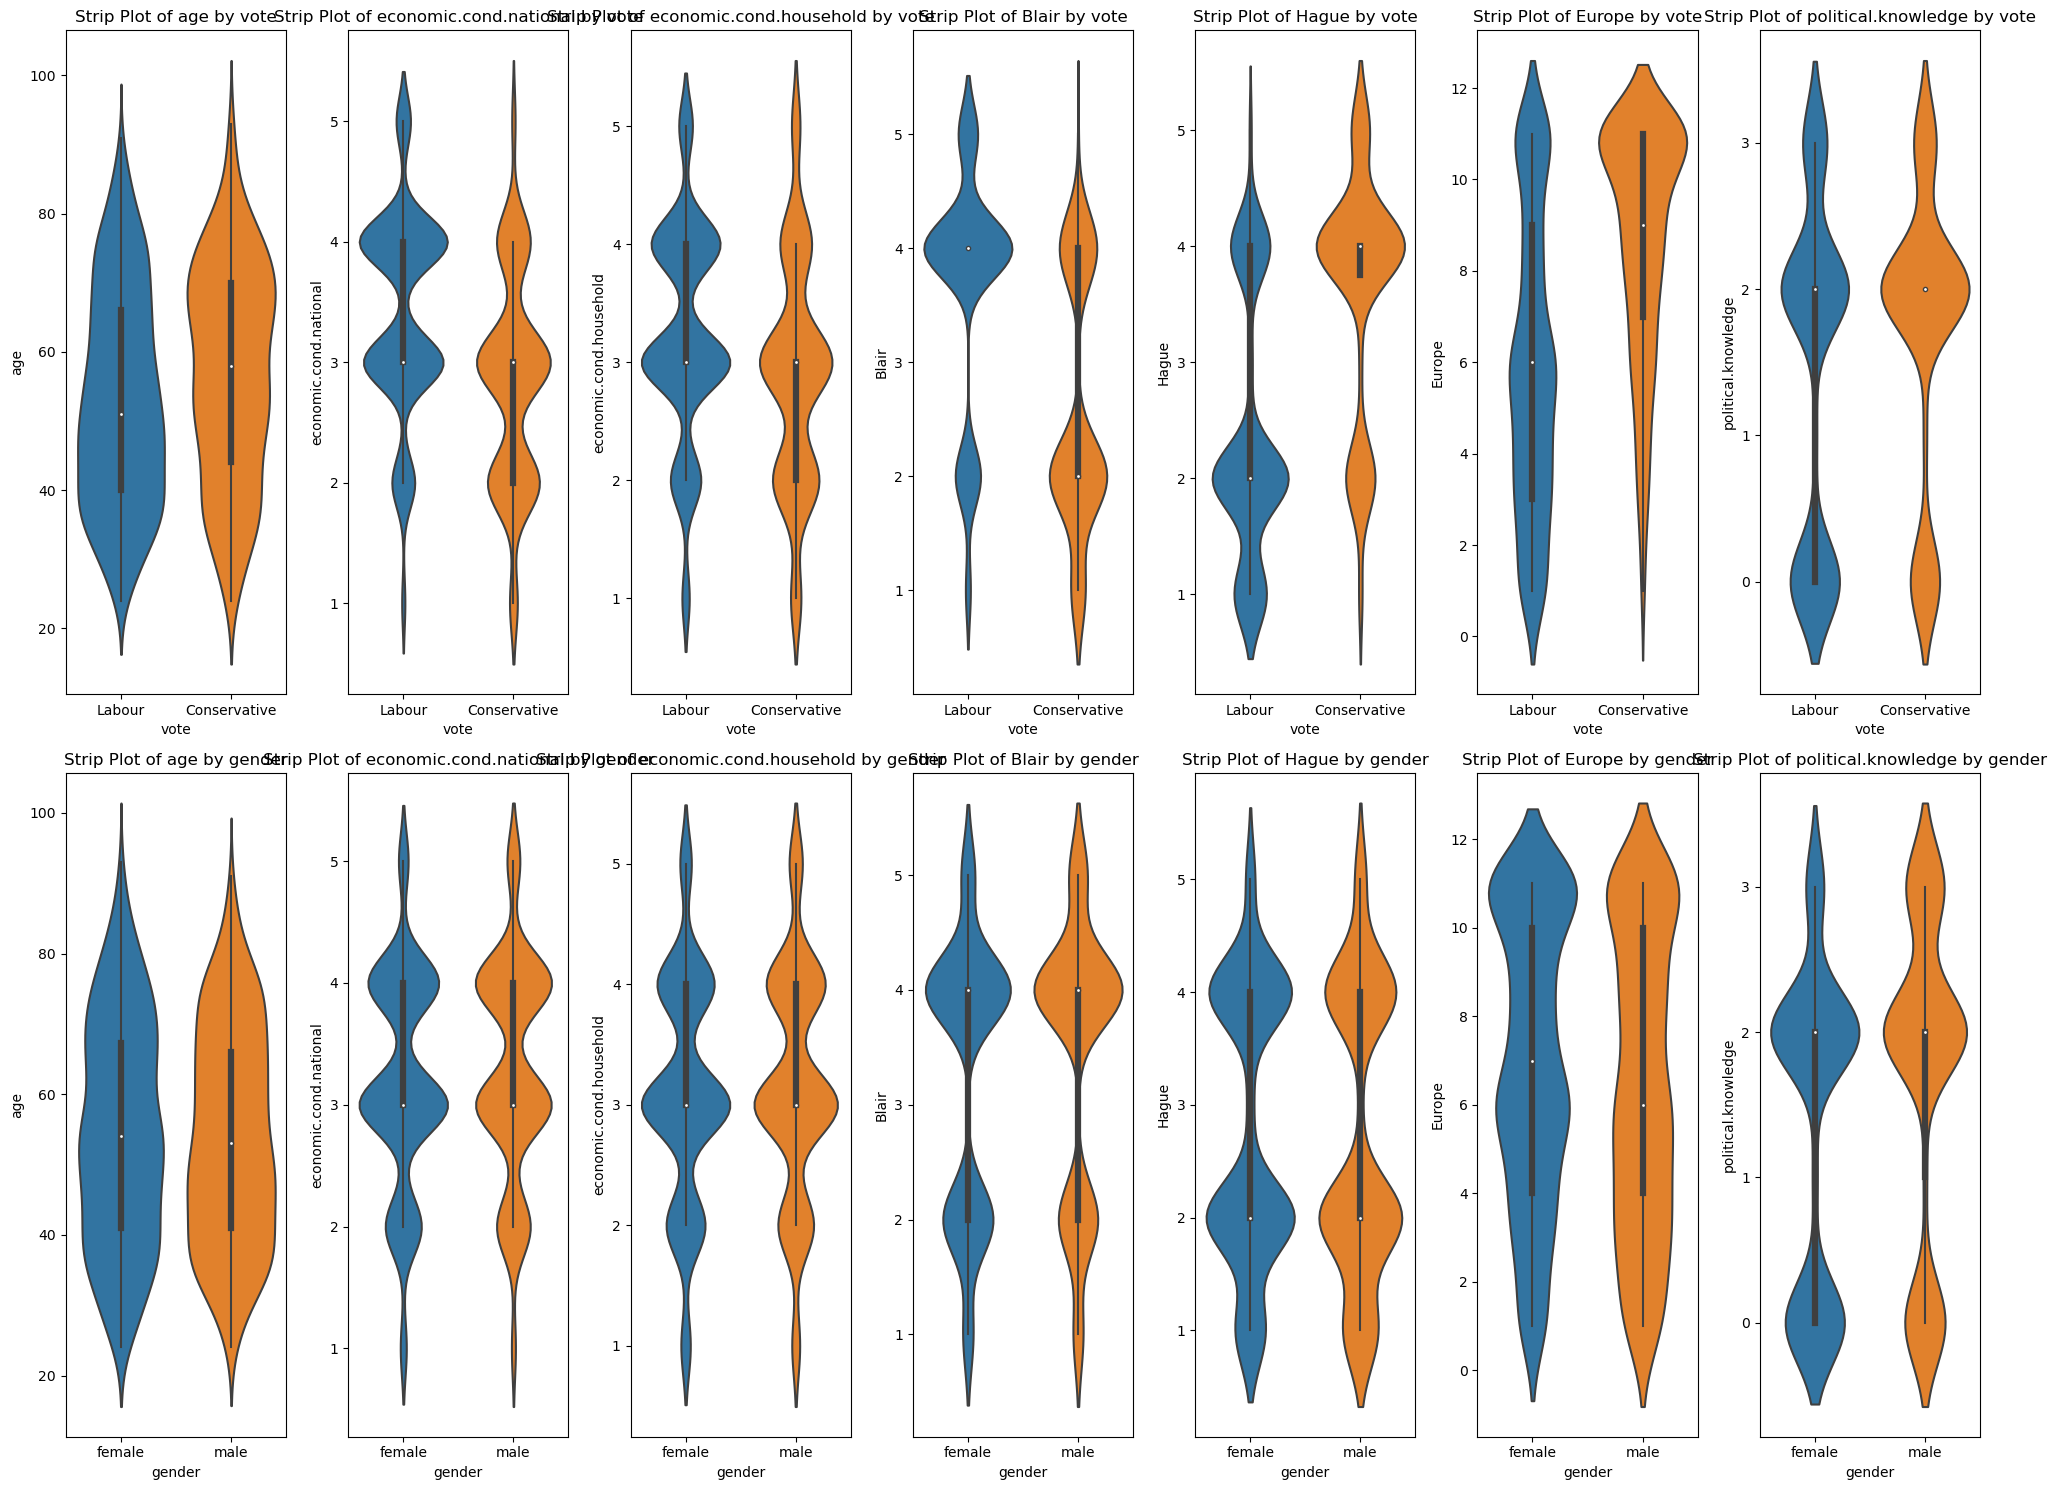

In [32]:
# Create a sample DataFrame
data = poll_df.copy()
df = pd.DataFrame(data)

# Get the list of categorical and numerical column names
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate the number of subplots needed
num_plots = len(categorical_columns) * len(numerical_columns)

# Calculate the number of rows and columns for subplots
num_rows = len(categorical_columns)
num_cols = len(numerical_columns)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Loop through categorical and numerical variables for multivariate plots
for i, categorical_var in enumerate(categorical_columns):
    for j, numerical_var in enumerate(numerical_columns):
        if categorical_var != numerical_var:
            ax = axes[i, j]
            
            sns.violinplot(data=df, x=categorical_var, y=numerical_var, jitter=True, dodge=True, ax=ax)
            ax.set_title(f'Strip Plot of {numerical_var} by {categorical_var}')
            ax.set_xlabel(categorical_var)
            ax.set_ylabel(numerical_var)
            
            plt.tight_layout()

# Show the subplots
plt.show()

In [33]:
poll_df.groupby(['vote'])['age'].median() 

vote
Conservative    58.0
Labour          51.0
Name: age, dtype: float64

In [34]:
poll_df.groupby(['vote'])['Europe'].median() 

vote
Conservative    9.0
Labour          6.0
Name: Europe, dtype: float64

#### Number of aged voters support conservative party compared to Labour party.

#### Conservative supporter are more Eurosceptic as per above plot. 

#### Gender wise all the features are almost same as per above plot. Females are less interested in integrating with Europe compared to males

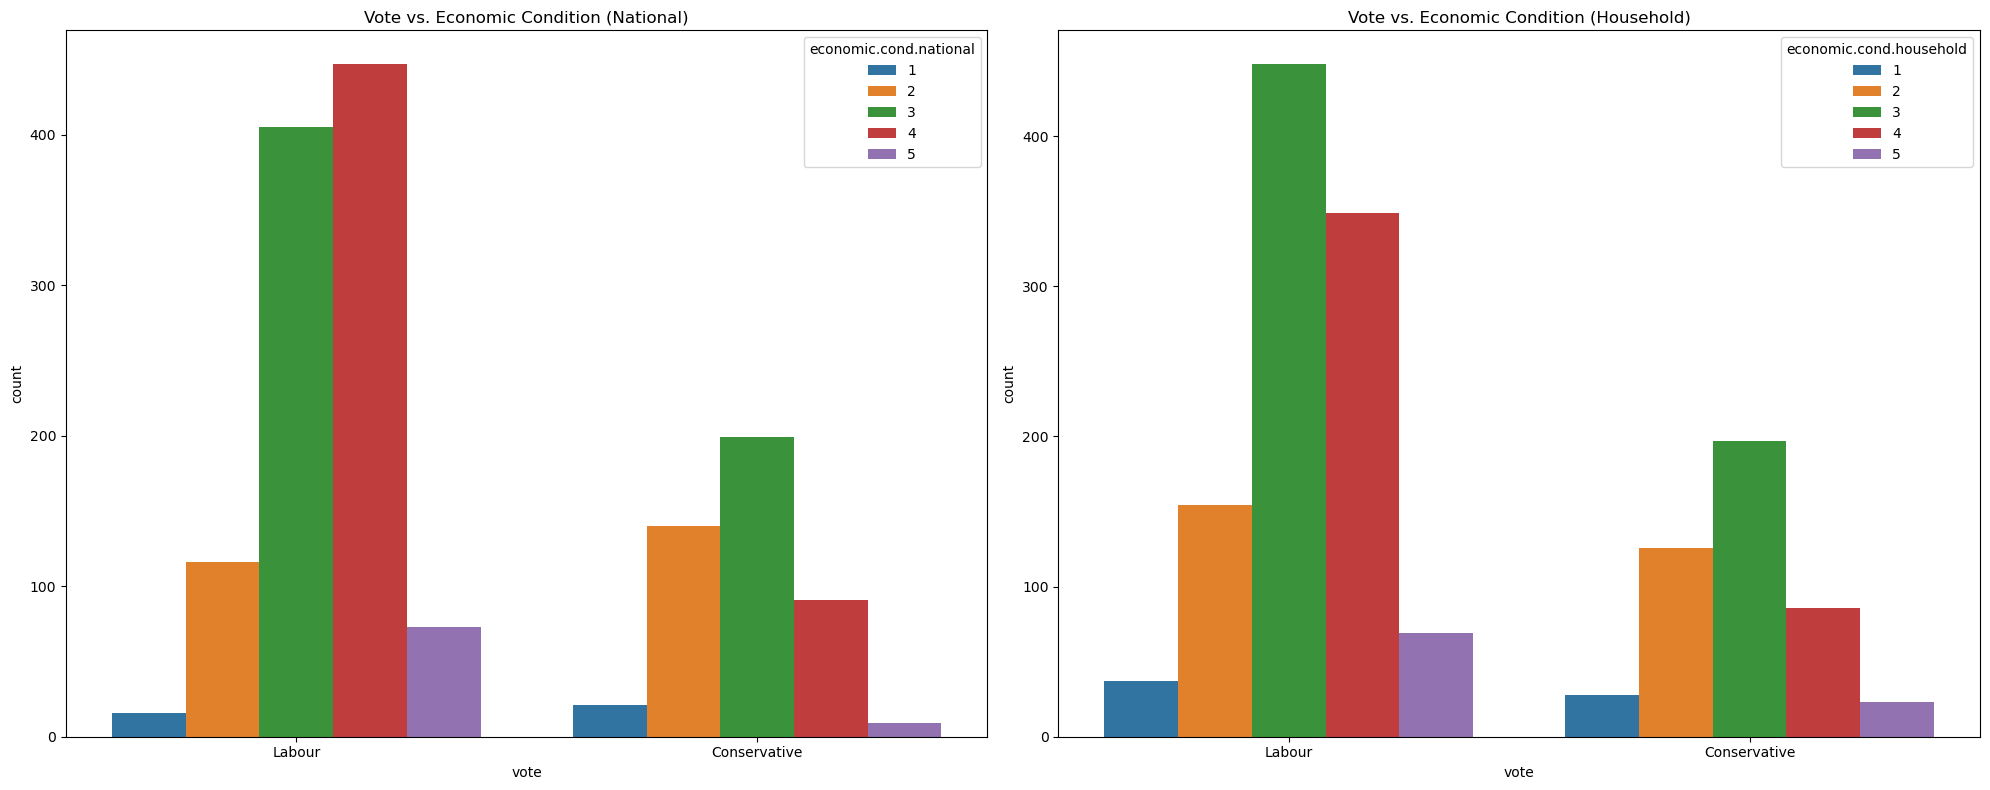

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,8)
sns.countplot(data=poll_df, x='vote', hue='economic.cond.national', ax=axes[0])
sns.countplot(data=poll_df, x='vote', hue='economic.cond.household', ax=axes[1])
axes[0].set_title('Vote vs. Economic Condition (National)')
axes[1].set_title('Vote vs. Economic Condition (Household)')
plt.tight_layout()
plt.show()

<Axes: xlabel='vote,economic.cond.national'>

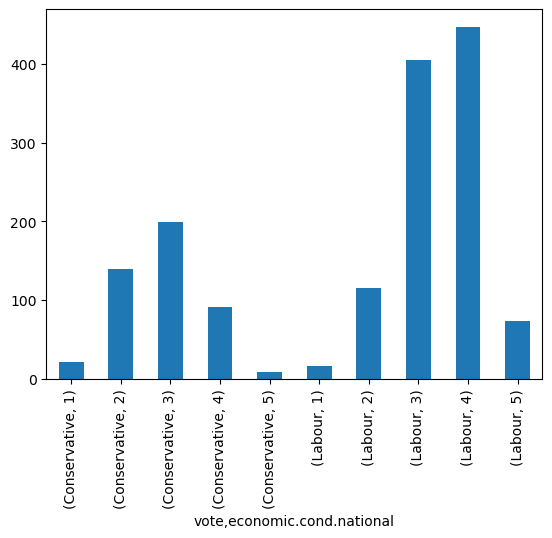

In [36]:
poll_df.groupby(['vote','economic.cond.national'])['economic.cond.national'].count().plot(kind='bar')

In [37]:
poll_df.groupby(['vote'])['economic.cond.national'].value_counts()

vote          economic.cond.national
Conservative  3                         199
              2                         140
              4                          91
              1                          21
              5                           9
Labour        4                         447
              3                         405
              2                         116
              5                          73
              1                          16
Name: economic.cond.national, dtype: int64

In [38]:
poll_df.groupby(['vote'])['economic.cond.household'].value_counts()

vote          economic.cond.household
Conservative  3                          197
              2                          126
              4                           86
              1                           28
              5                           23
Labour        3                          448
              4                          349
              2                          154
              5                           69
              1                           37
Name: economic.cond.household, dtype: int64

#### Labour supporters has high number of rating as 4 in economic condition national and 3 in economic condition household. Conservative supporters both feature has 3 as the highest rating. This shows Labour party is doing good in terms of education, health, environment and infrastructure compared to conservative party. 

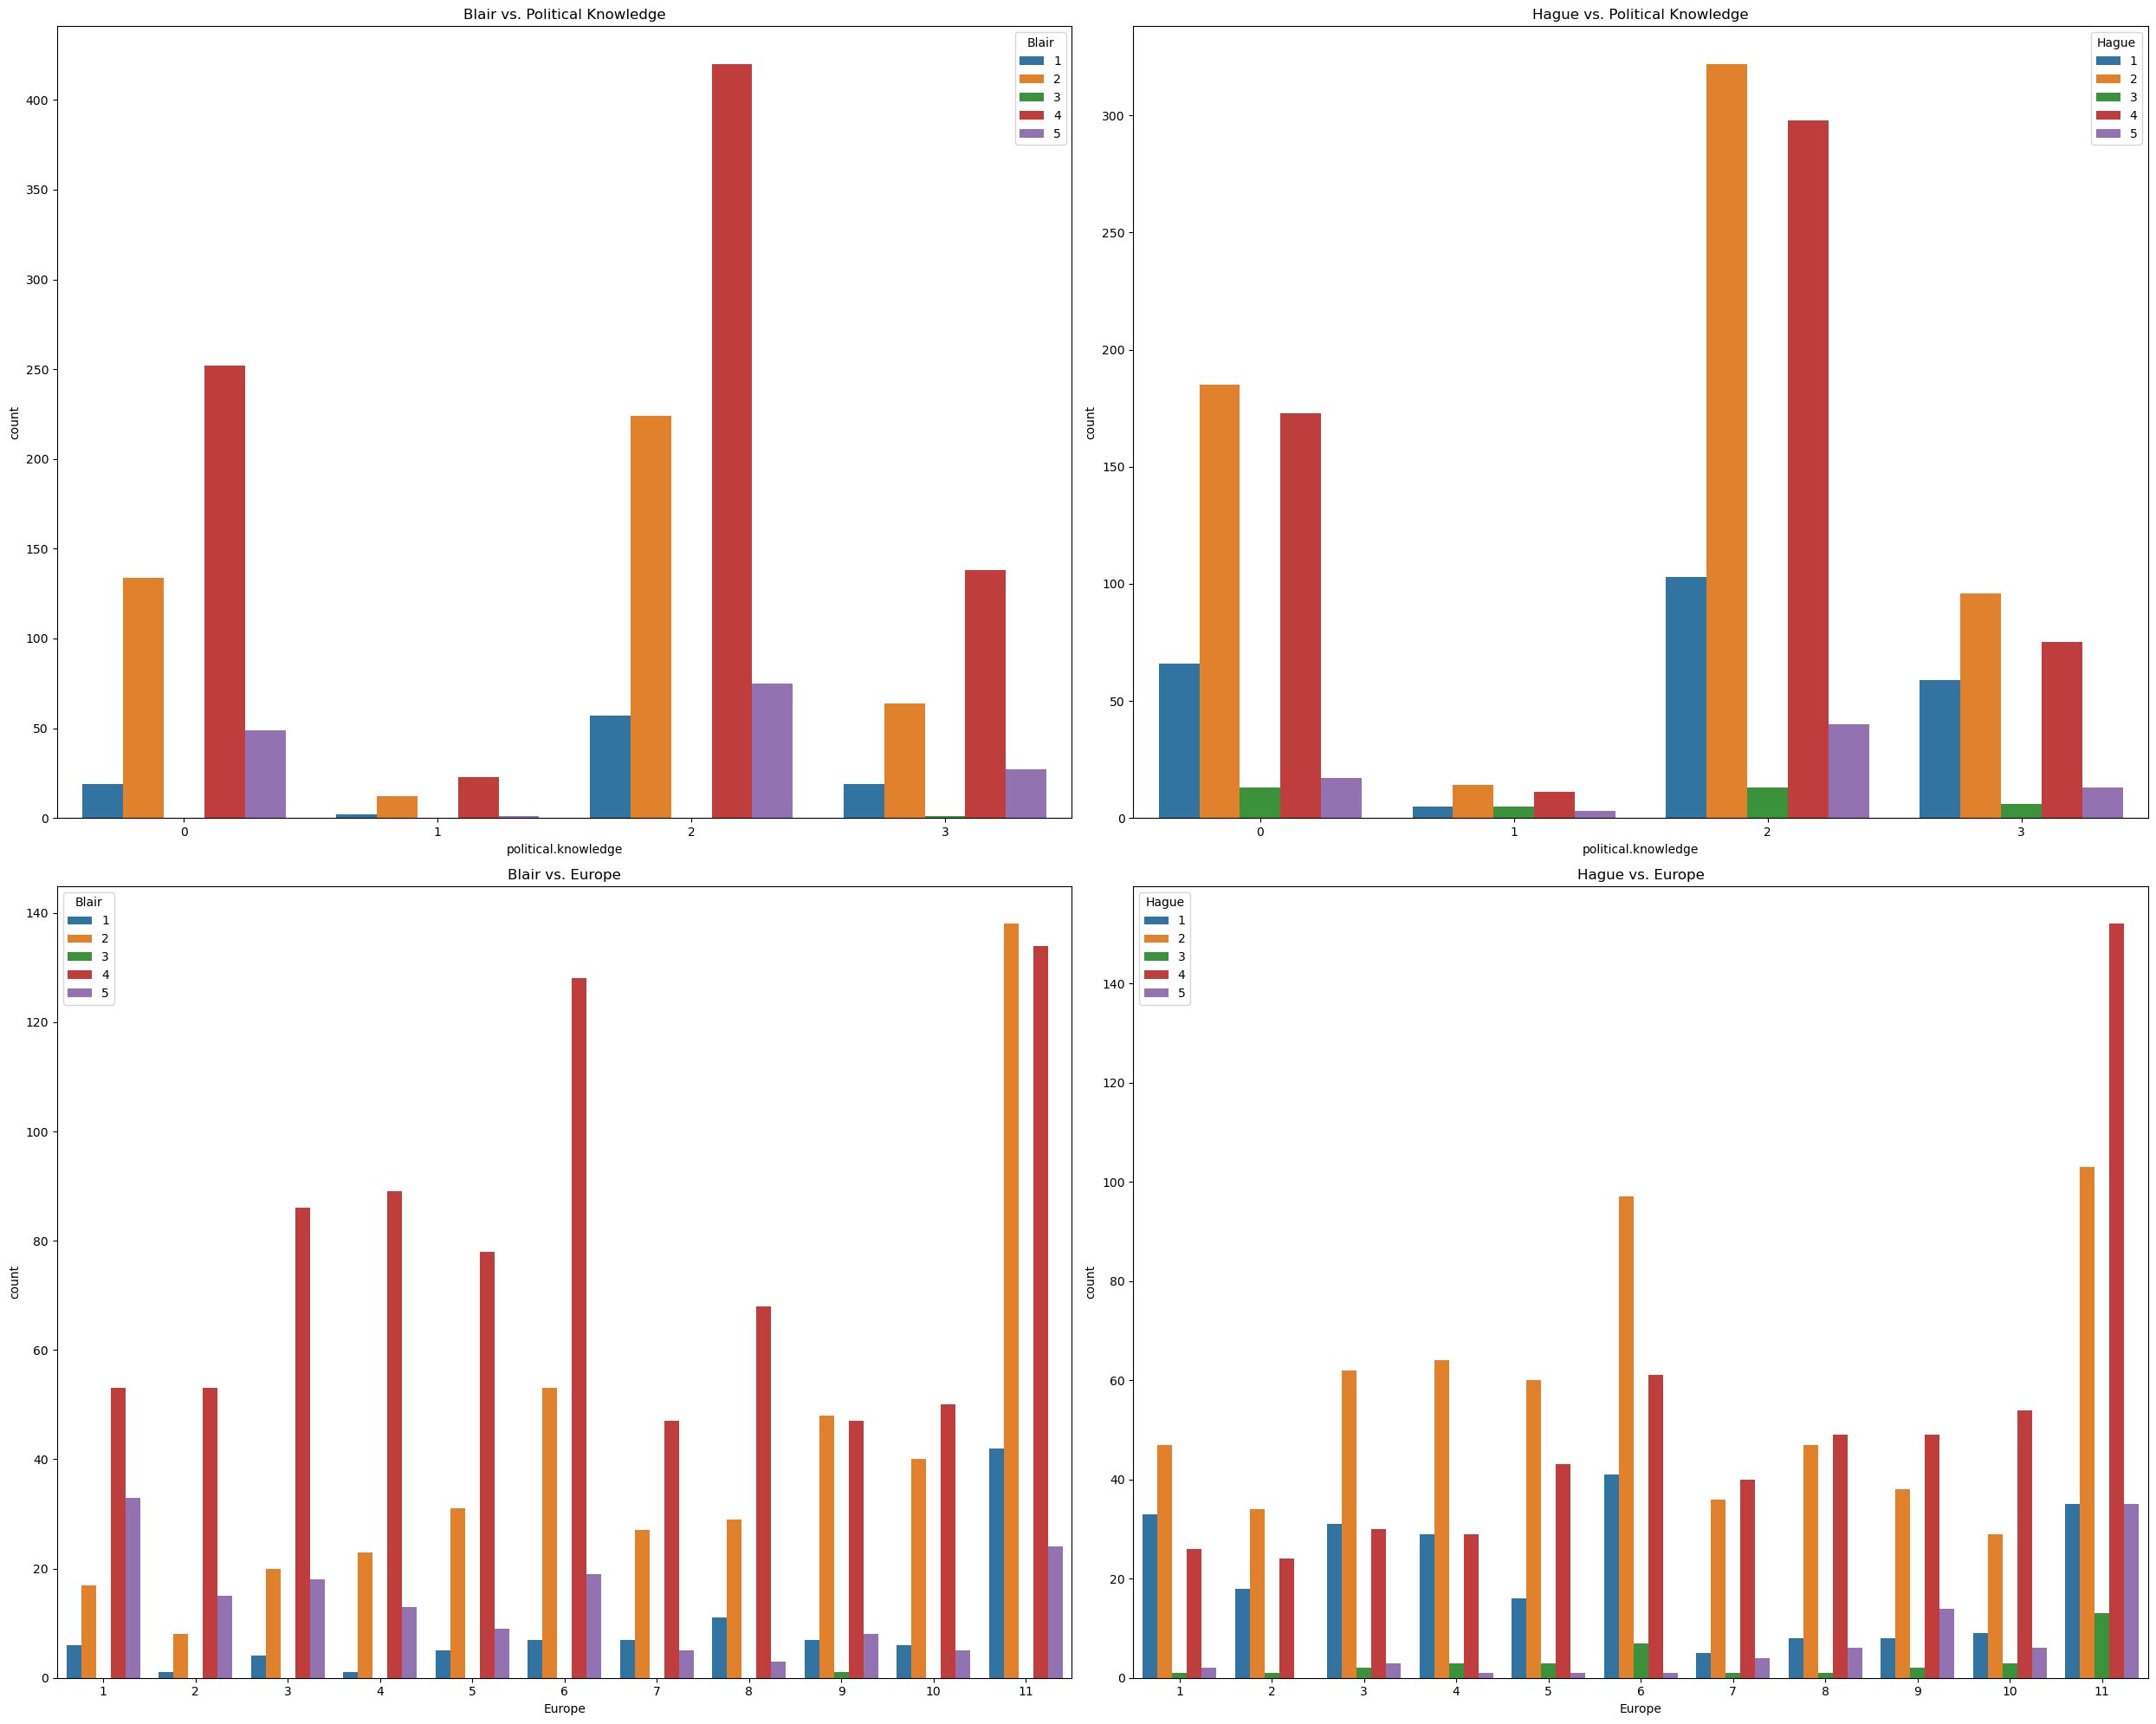

In [39]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(25,20)
# Create count plots within subplots
sns.countplot(data=poll_df, x='political.knowledge', hue='Blair', ax=axes[0, 0])
sns.countplot(data=poll_df, x='political.knowledge', hue='Hague', ax=axes[0, 1])
sns.countplot(data=poll_df, x='Europe', hue='Blair', ax=axes[1, 0])
sns.countplot(data=poll_df, x='Europe', hue='Hague', ax=axes[1, 1])

# Add titles to subplots
axes[0, 0].set_title('Blair vs. Political Knowledge')
axes[0, 1].set_title('Hague vs. Political Knowledge')
axes[1, 0].set_title('Blair vs. Europe')
axes[1, 1].set_title('Hague vs. Europe')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

#### Political knowledge of Labour supporters are high compared to conservative supporters and Euroscepticism is more shown by the conservative party than labour supporters. 

In [40]:
poll_df.corr().round(2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.00,0.02,-0.04,0.03,0.03,0.06,-0.05
economic.cond.national,0.02,1.00,0.35,0.33,-0.20,-0.21,-0.02
economic.cond.household,-0.04,0.35,1.00,0.22,-0.10,-0.11,-0.04
Blair,0.03,0.33,0.22,1.00,-0.24,-0.30,-0.02
Hague,0.03,-0.20,-0.10,-0.24,1.00,0.29,-0.03
Europe,0.06,-0.21,-0.11,-0.30,0.29,1.00,-0.15
political.knowledge,-0.05,-0.02,-0.04,-0.02,-0.03,-0.15,1.00


In [41]:
poll_df.cov().round(2)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,246.54,0.26,-0.57,0.59,0.60,3.34,-0.79
economic.cond.national,0.26,0.78,0.29,0.34,-0.22,-0.61,-0.02
economic.cond.household,-0.57,0.29,0.87,0.24,-0.12,-0.35,-0.04
Blair,0.59,0.34,0.24,1.38,-0.35,-1.15,-0.03
Hague,0.60,-0.22,-0.12,-0.35,1.52,1.16,-0.04
Europe,3.34,-0.61,-0.35,-1.15,1.16,10.88,-0.54
political.knowledge,-0.79,-0.02,-0.04,-0.03,-0.04,-0.54,1.18


## 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

### Encoding the object features using pd.getdummies

In [42]:
poll_df["gender"].value_counts()

female    808
male      709
Name: gender, dtype: int64

In [43]:
poll_df["vote"].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [44]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


#### Converting the object values into numbers to convert into an integer datatype, since there are only two values, we do manual imputation by labeling the values as below

#### Vote: Conservative = 0 and Labour = 1 , because the majority observations are for Labour and hence we consider Labour = 1 as our target variable

#### Gender: Male = 1 and Female = 0

In [45]:
#poll_df['vote']=np.where(poll_df['vote'] == 'Conservative','0','1')

In [46]:
#poll_df['gender']=np.where(poll_df['gender'] == 'male','1','0')

In [47]:
poll_df = pd.get_dummies(poll_df,columns=cat_cols,drop_first=True).astype(int)

In [48]:
#poll_df.columns = poll_df.columns.str.replace('_1', '')

In [49]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   int64
 8   gender_male              1517 non-null   int64
dtypes: int64(9)
memory usage: 118.5 KB


In [50]:
poll_df.head(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
1,43,3,3,4,1,2,2,1,0
2,36,4,4,4,4,5,2,1,1
3,35,4,4,5,2,3,2,1,1
4,24,4,2,2,1,4,0,1,0
5,41,2,2,1,1,6,2,1,1
6,47,3,4,4,4,4,2,1,1
7,57,2,2,4,4,11,2,1,1
8,77,3,4,4,1,1,0,1,1
9,39,3,3,4,4,11,0,1,0
10,70,3,2,5,1,11,2,1,1


### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x = poll_df.drop("vote_Labour",axis = 1)
y = poll_df.pop("vote_Labour")

In [53]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 123)

In [54]:
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (1061, 8)
x_test: (456, 8)
y_train: (1061,)
y_test: (456,)


In [55]:
#x_train

#### Going to scale the data using standard scaler as the age feature has different scale compared to other feature units

### Scaling Train and Test independent variables separately 

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_train)

In [58]:
scaled_data_test = scaler.fit_transform(x_test)

In [59]:
scaled_df = pd.DataFrame(scaled_data, columns=x_train.columns).astype(int)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1061 non-null   int64
 1   economic.cond.national   1061 non-null   int64
 2   economic.cond.household  1061 non-null   int64
 3   Blair                    1061 non-null   int64
 4   Hague                    1061 non-null   int64
 5   Europe                   1061 non-null   int64
 6   political.knowledge      1061 non-null   int64
 7   gender_male              1061 non-null   int64
dtypes: int64(8)
memory usage: 66.4 KB


In [60]:
scaled_df_test = pd.DataFrame(scaled_data_test, columns=x_test.columns).astype(int)
scaled_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      456 non-null    int64
 1   economic.cond.national   456 non-null    int64
 2   economic.cond.household  456 non-null    int64
 3   Blair                    456 non-null    int64
 4   Hague                    456 non-null    int64
 5   Europe                   456 non-null    int64
 6   political.knowledge      456 non-null    int64
 7   gender_male              456 non-null    int64
dtypes: int64(8)
memory usage: 28.6 KB


In [61]:
scaled_df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0,-1,-1,0,1,0,1,1
1,-1,0,0,0,0,0,0,1
2,1,0,2,0,0,-1,-1,1
3,0,0,0,-1,0,1,0,0
4,0,-1,0,0,0,-1,1,1


In [62]:
x_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
388,63,2,2,4,4,5,3,1
735,29,4,3,4,2,4,2,1
1020,77,4,5,4,2,1,0,1
964,66,3,3,2,3,11,1,0
785,45,2,3,4,2,2,3,1


## 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis). Interpret the inferences of both models. Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Logistic Regression and LDA (Linear Discriminant Analysis)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression(max_iter=1000,random_state= 123)

In [65]:
lr.fit(scaled_df,y_train)

LogisticRegression(max_iter=1000, random_state=123)

In [66]:
y_train_predict=lr.predict(scaled_df)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       319
           1       0.85      0.91      0.88       742

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.82      0.83      0.82      1061



In [69]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.75      0.63      0.69       319
           1       0.85      0.91      0.88       742

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.82      0.83      0.82      1061



Axes(0.125,0.11;0.62x0.77)


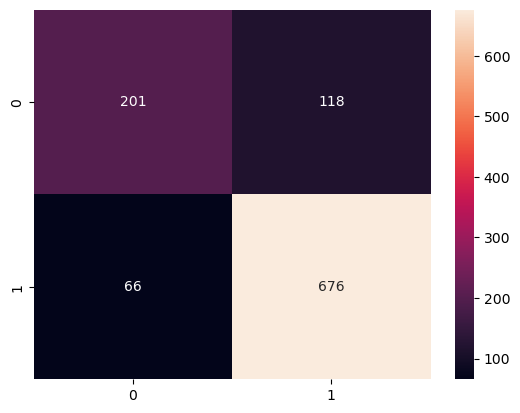

In [70]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

Axes(0.125,0.11;0.62x0.77)


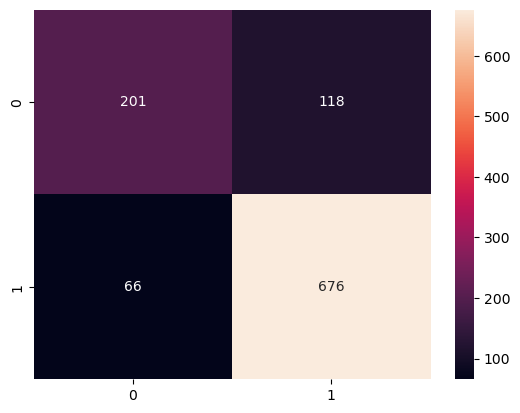

In [71]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.31      1.00      0.47       141
           1       0.00      0.00      0.00       315

    accuracy                           0.31       456
   macro avg       0.15      0.50      0.24       456
weighted avg       0.10      0.31      0.15       456



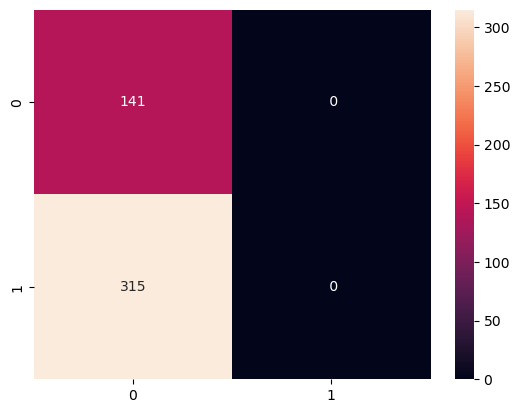

In [72]:
print(sns.heatmap(confusion_matrix(y_test,lr.predict(x_test)),annot=True, fmt="2g"))
print(classification_report(y_test,lr.predict(x_test)))

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.71      0.33      0.45       141
           1       0.76      0.94      0.84       315

    accuracy                           0.75       456
   macro avg       0.73      0.63      0.64       456
weighted avg       0.74      0.75      0.72       456



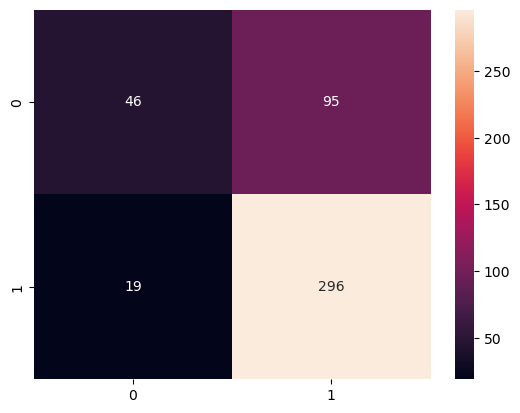

In [73]:
print(sns.heatmap(confusion_matrix(y_test,lr.predict(scaled_df_test)),annot=True, fmt="2g"))
print(classification_report(y_test,lr.predict(scaled_df_test)))

In [74]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.17342130065975495


In [75]:
print(mean_squared_error(lr.predict(x_test), y_test))

0.6907894736842105


In [76]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.779


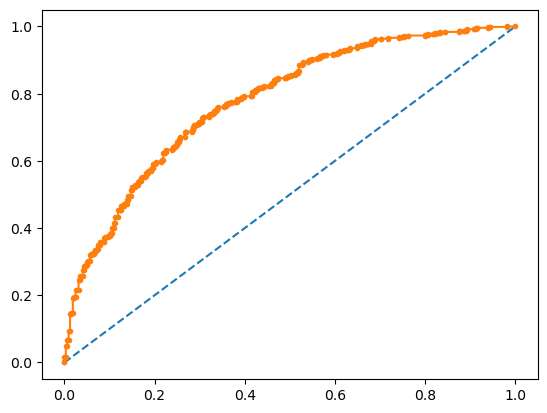

In [77]:
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

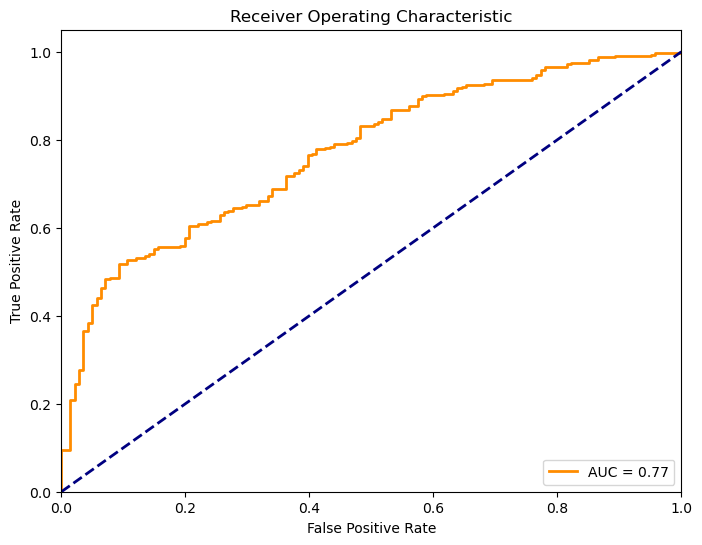

In [78]:
from sklearn.metrics import roc_curve, auc
probs = lr.predict_proba(x_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)
roc_auc = auc(fpr1, tpr1)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#### Logistic Regression
>> <b> Labour which is majority of data is our target variable '1' </b> 

>> <b> train dataset Precision: 0.87   Recall: 0.92  F1-Score: 0.89 Accuracy: 0.84 </b>

>> <b> test dataset Precision: 0.84   Recall: 0.91  F1-Score: 0.88 Accuracy: 0.82 </b>

>> <b>Accuracy using train and test dataset is 84 and 82 % respectively. This model doesn't overfit as the threshold is within 10 % of variance. Area Under Curve shows decent </b>

### Linear Discriminant Analysis

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [80]:
lda = LinearDiscriminantAnalysis()

In [81]:
lda = lda.fit(x_train,y_train)

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       290
           1       0.90      0.87      0.89       771

    accuracy                           0.84      1061
   macro avg       0.80      0.81      0.80      1061
weighted avg       0.84      0.84      0.84      1061



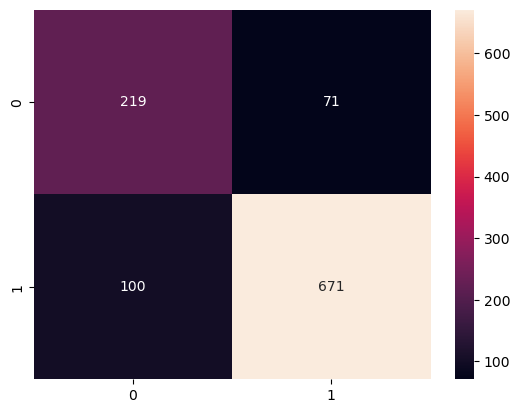

In [82]:
print(sns.heatmap(confusion_matrix(lda.predict(x_train),y_train), annot=True, fmt="2g"))
print(classification_report(lda.predict(x_train),y_train))

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       121
           1       0.90      0.85      0.88       335

    accuracy                           0.82       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.84      0.82      0.83       456



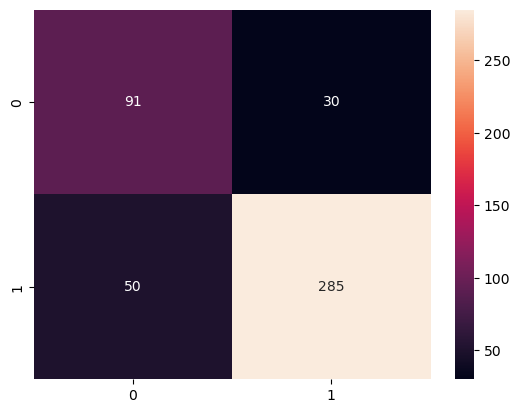

In [83]:
print(sns.heatmap(confusion_matrix(lda.predict(x_test),y_test), annot=True, fmt="2g"))
print(classification_report(lda.predict(x_test),y_test))

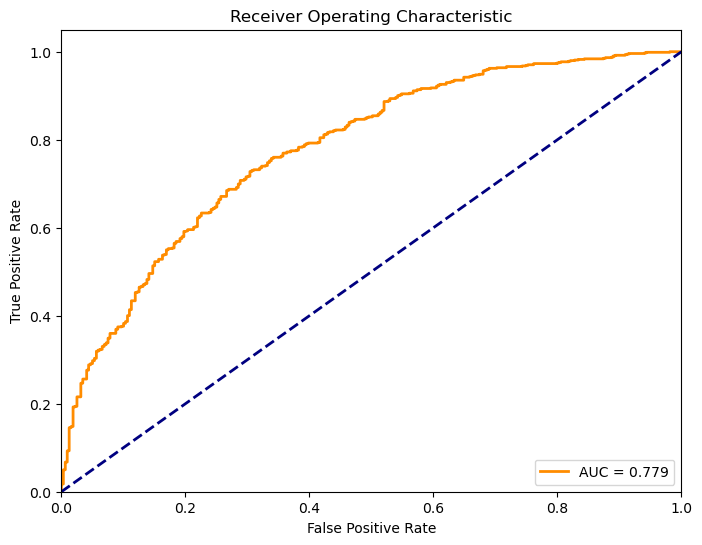

In [84]:
from sklearn.metrics import roc_curve, auc
probs = lr.predict_proba(x_train)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_train, probs)
roc_auc = auc(fpr1, tpr1)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

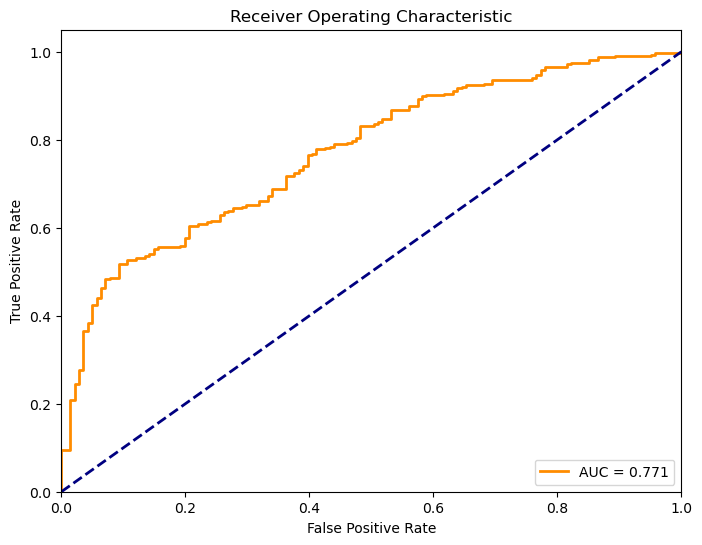

In [85]:
from sklearn.metrics import roc_curve, auc
probs = lr.predict_proba(x_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)
roc_auc = auc(fpr1, tpr1)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#### Linear Discriminant Analysis
>> <b> Labour which is majority of data is our target variable '1' </b> 

>> <b> train dataset Precision: 0.90   Recall: 0.87  F1-Score: 0.89 Accuracy: 0.84 </b>

>> <b> test dataset Precision: 0.90   Recall: 0.85  F1-Score: 0.88 Accuracy: 0.82 </b>

>> <b>Accuracy using train and test dataset is 84 and 82 % respectively. There is no over-fit or under-fit since the variance is under the threshold value of 10%. Area Under Curve shows decent </b>

## 1.5) Apply KNN Model and Naïve Bayes Model. Interpret the inferences of each model. Successful implementation of each model. Logical reason should be shared if any custom changes are made to the parameters while building the model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

## K-nearest neighbor

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [88]:
knn = knn.fit(x_train,y_train)

In [89]:
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

0.7785087719298246

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       289
           1       0.93      0.89      0.91       772

    accuracy                           0.87      1061
   macro avg       0.83      0.85      0.84      1061
weighted avg       0.88      0.87      0.87      1061



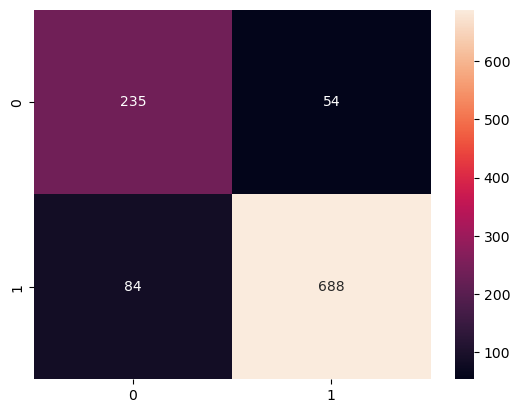

In [90]:
print(sns.heatmap(confusion_matrix(knn.predict(x_train),y_train),annot=True , fmt="2g"))
print(classification_report(knn.predict(x_train),y_train))

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.57      0.67      0.61       120
           1       0.87      0.82      0.84       336

    accuracy                           0.78       456
   macro avg       0.72      0.74      0.73       456
weighted avg       0.79      0.78      0.78       456



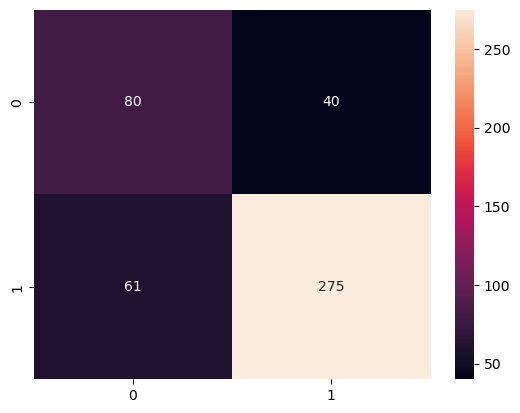

In [91]:
print(sns.heatmap(confusion_matrix(knn.predict(x_test),y_test),annot=True , fmt="2g"))
print(classification_report(knn.predict(x_test),y_test))

AUC: 0.937


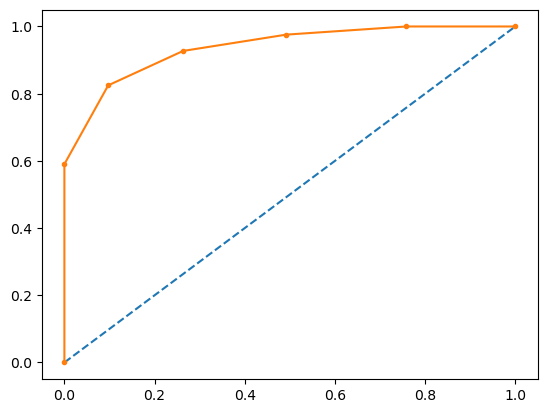

In [92]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.818


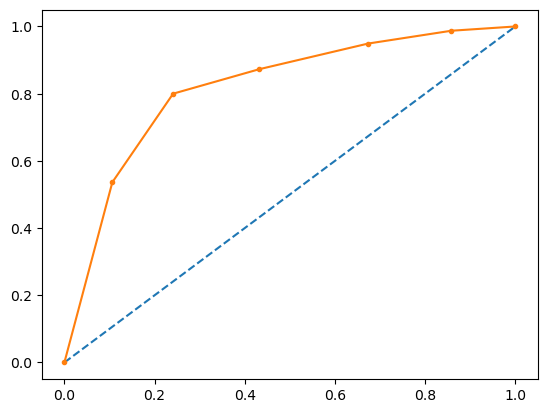

In [93]:
# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

####  K-Nearest Neighbour

>> <b> Train Dataset Precision: 0.93    Recall: 0.89   F1-Score: 0.91 Accuracy : 0.87 </b>

>> <b> Test Dataset Precision: 0.87   Recall: 0.82   F1-Score: 0.84 Accuracy: 0.78 </b>

>> <b> The accuracy between train and test is 87 and 78 % respectively. This model has slightly higher variance between train and test observations. The difference is within 10% and we can accept it as not as over-fit model. But comparing with other models the accuracy is so high to consider this model </b>

### Naive Bayes 

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
nb=GaussianNB()

In [96]:
nb= nb.fit(x_train, y_train)

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       308
           1       0.89      0.88      0.89       753

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



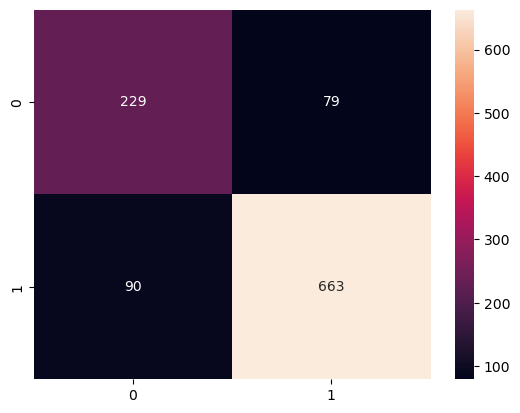

In [97]:
print(sns.heatmap(confusion_matrix(nb.predict(x_train),y_train), annot=True, fmt="2g"))
print(classification_report(nb.predict(x_train),y_train))

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.65      0.73      0.68       125
           1       0.89      0.85      0.87       331

    accuracy                           0.82       456
   macro avg       0.77      0.79      0.78       456
weighted avg       0.82      0.82      0.82       456



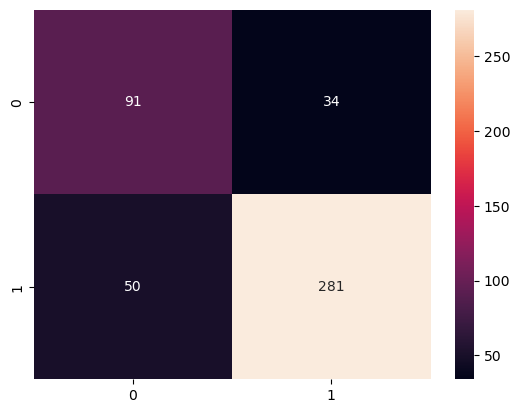

In [98]:
print(sns.heatmap(confusion_matrix(nb.predict(x_test),y_test),annot=True, fmt="2g"))
print(classification_report(nb.predict(x_test),y_test))

AUC: 0.888


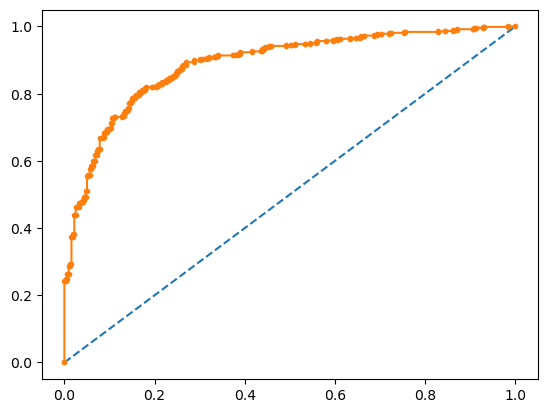

In [99]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.');

AUC: 0.879


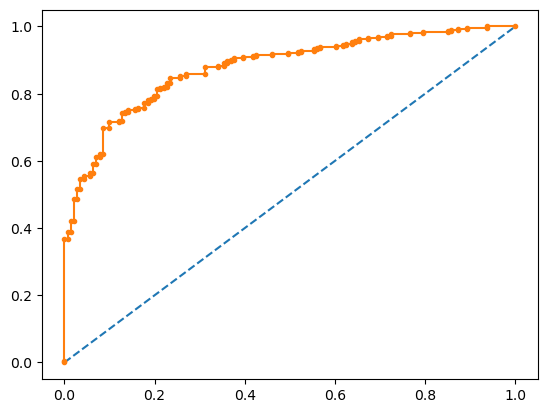

In [100]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

####  Naive Bayes


>> <b> Train Dataset Precision: 0.89    Recall: 0.88   F1-Score: 0.89 Accuracy : 0.84 </b>


>> <b> Test Dataset Precision: 0.89   Recall: 0.85   F1-Score: 0.87 Accuracy: 0.82 </b>

>> <b> The accuracy between train and test is 84 and 82 % respectively. This model has slightly higher variance between train and test observations. The difference is within 10% and we can accept it as not as over-fit model. </b>

## 1.6) Model Tuning, Bagging and Boosting. Apply grid search on each model (include all models) and make models on best_params. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

### Model Tuning - Bagging using Random Forest

> Using GridSearchCV and RandomForest algorithm, we shall find the best parameters and estimators. RandomForest is multiples of decision tree that will produce an better result. In bagging, the algorithm trains the model in subset of data in parallel. The subset data is generated randomly from the main set replacing the original value. 

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [102]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [123]
}

In [103]:
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

In [104]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'random_state': [123]})

In [105]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100, 'random_state': 123}
Best Score:  0.8435290991230401


In [106]:
rfc_bestparam = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=123)
rfc_bestparam.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=123)

0.8944392082940622
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       319
           1       0.91      0.95      0.93       742

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



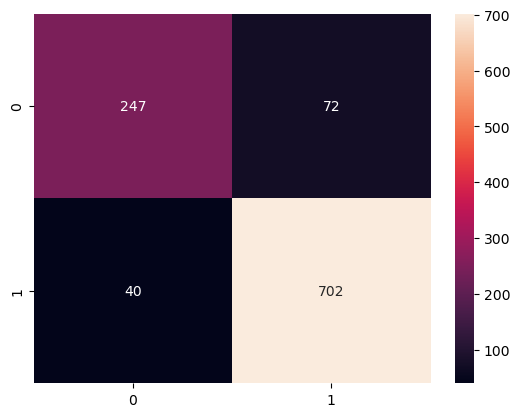

In [107]:
## Performance Matrix on train data set
y_train_predict = rfc_bestparam.predict(x_train)
model_score = rfc_bestparam.score(x_train, y_train)
print(model_score)
print(sns.heatmap(confusion_matrix(y_train, y_train_predict), annot=True, fmt="2g"))
print(classification_report(y_train, y_train_predict))

0.8223684210526315
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.75      0.63      0.69       141
           1       0.85      0.91      0.88       315

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.82      0.82      0.82       456



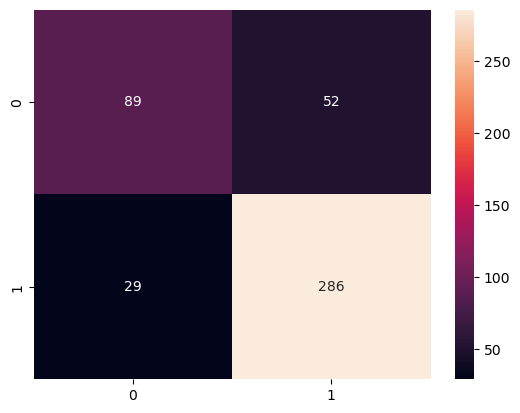

In [108]:
## Performance Matrix on train data set
y_test_predict = rfc_bestparam.predict(x_test)
model_score = rfc_bestparam.score(x_test, y_test)
print(model_score)
print(sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt="2g"))
print(classification_report(y_test, y_test_predict))

AUC: 0.960


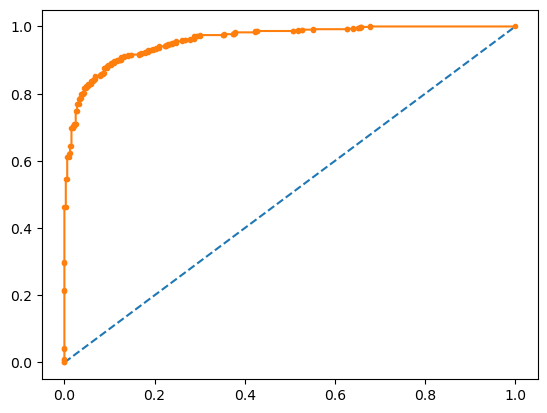

In [109]:
probs = rfc_bestparam.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.888


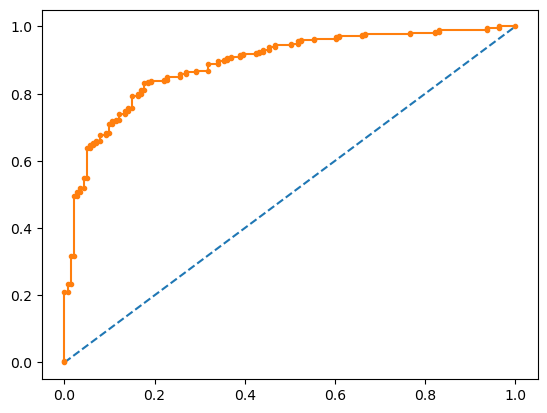

In [110]:
probs = rfc_bestparam.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

####  Bagging using Random Forest


>> <b> Train Dataset Precision: 0.90    Recall: 0.95   F1-Score: 0.93 Accuracy : 0.89 </b>


>> <b> Test Dataset Precision: 0.83   Recall: 0.90   F1-Score: 0.86 Accuracy: 0.82 </b>

>> <b> The accuracy between train and test is 89 and 82 % respectively. This model has slightly higher variance between train and test observations. The difference is within 10% and we can accept it as not as over-fit model. </b>

### Boosting using Ada Booster

In [111]:
from sklearn.ensemble import AdaBoostClassifier

In [112]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [113]:
ADB_model=AdaBoostClassifier()

In [114]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [115]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [116]:
ADB_model=grid_search.best_estimator_

In [117]:
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

0.8510838831291234
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       319
           1       0.88      0.91      0.89       742

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



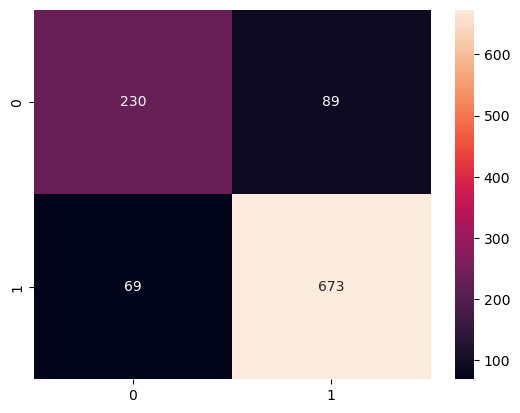

In [118]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(sns.heatmap(confusion_matrix(y_train, y_train_predict), annot=True, fmt="2g"))
print(classification_report(y_train, y_train_predict))

0.8092105263157895
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       141
           1       0.84      0.89      0.87       315

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.80      0.81      0.81       456



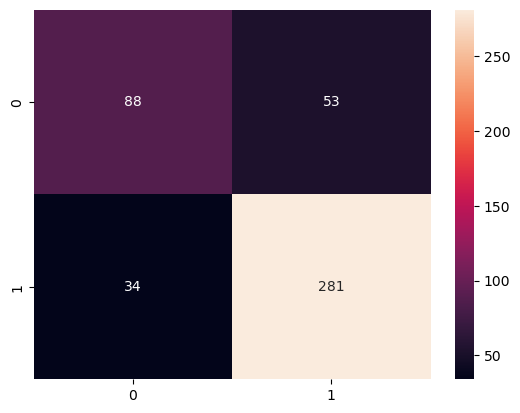

In [119]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print( sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt="2g"))
print( classification_report(y_test, y_test_predict))

AUC: 0.915


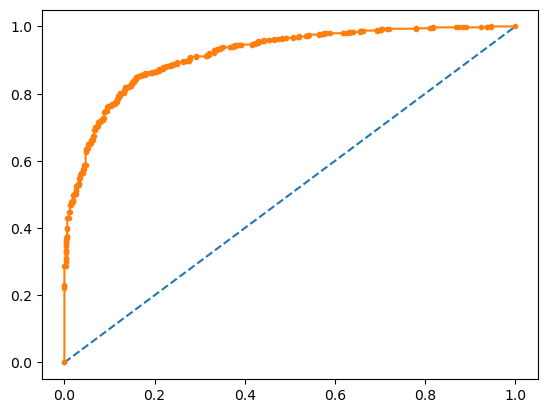

In [120]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.859


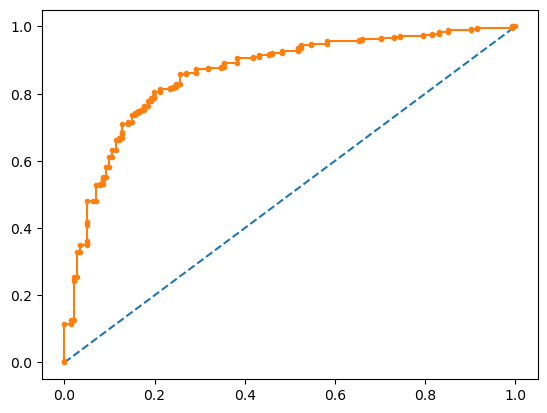

In [121]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Ada Boost ensemble model


>> <b> Train Dataset Precision: 0.88    Recall: 0.91   F1-Score: 0.89 Accuracy : 0.85 </b>


>> <b> Test Dataset Precision: 0.84   Recall: 0.89   F1-Score: 0.87 Accuracy: 0.82 </b>

>> <b> The accuracy between train and test is 85 and 82 % respectively. This model has slightly higher variance between train and test observations. The difference is within 10% and we can accept it as not as over-fit model. </b>

### Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20]
}

In [124]:
DT_model= DecisionTreeClassifier()

In [125]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [126]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100]})

In [127]:
DT_model=grid_search.best_estimator_

In [128]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=30)

0.8444863336475024
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       319
           1       0.88      0.90      0.89       742

    accuracy                           0.84      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



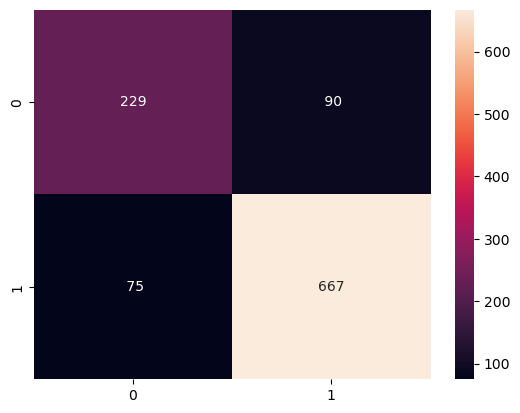

In [129]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print( sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True,fmt="3g"))
print( classification_report(y_train, y_train_predict))

0.8201754385964912
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       141
           1       0.86      0.88      0.87       315

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



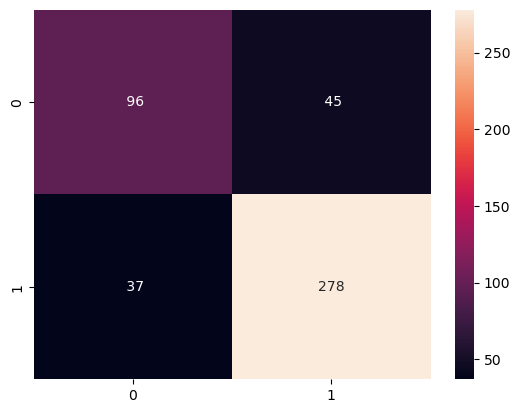

In [130]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print( sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True,fmt="3g"))
print( classification_report(y_test, y_test_predict))

AUC: 0.908


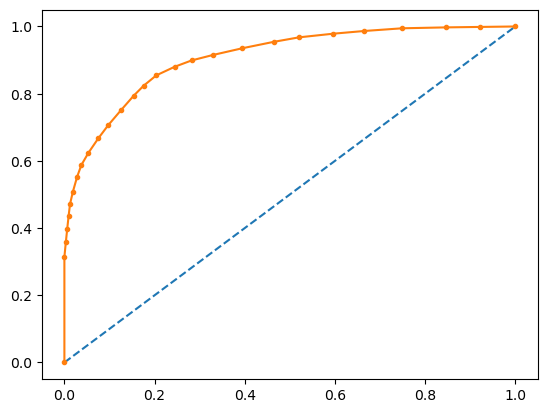

In [131]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.');

AUC: 0.864


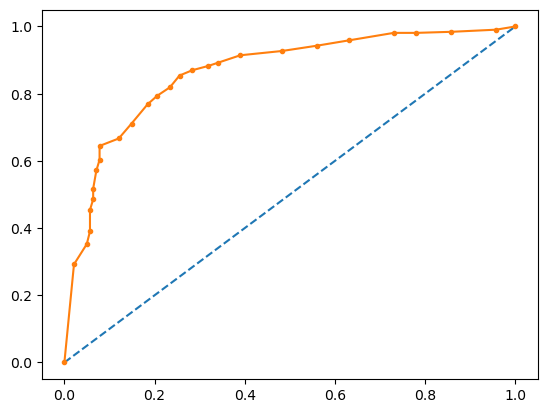

In [132]:
# predict probabilities
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show();

#### Decision Tree


>> <b> Train Dataset Precision: 0.88    Recall: 0.90   F1-Score: 0.89 Accuracy : 0.84 </b>


>> <b> Test Dataset Precision: 0.86   Recall: 0.88   F1-Score: 0.87 Accuracy: 0.82 </b>

>> <b> The accuracy between train and test is 84 and 82 % respectively. This model has slightly higher variance between train and test observations. The difference is within 10% and we can accept it as not as over-fit model. </b>

### Logistic Regression 

In [133]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

In [134]:
logreg_model = LogisticRegression()

In [135]:
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5)

In [136]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [137]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [138]:
lr_model_tune = LogisticRegression(C=10,penalty='l2',solver='liblinear',random_state=123)

In [139]:
lr_model_tune.fit(x_train,y_train)

LogisticRegression(C=10, random_state=123, solver='liblinear')

In [140]:
y_train_predict=lr_model_tune.predict(x_train)

In [141]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       319
           1       0.87      0.92      0.89       742

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



Axes(0.125,0.11;0.62x0.77)


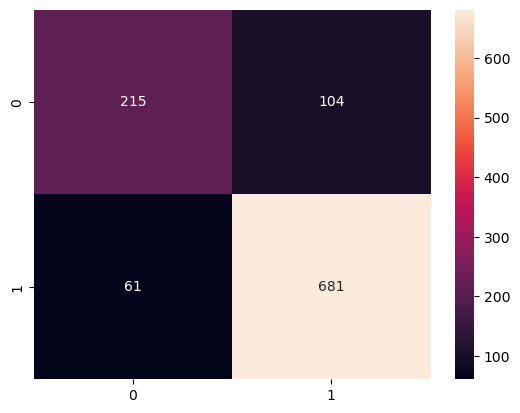

In [142]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

In [143]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, lr_model_tune.predict(x_test))

In [144]:
print("Accuracy:", accuracy)

Accuracy: 0.8201754385964912


In [145]:
accuracy = accuracy_score(y_train, lr_model_tune.predict(x_train))
print("train accuracy:", accuracy)

train accuracy: 0.8444863336475024
